# IBM HR Analytics Employee Attrition & Performance

##### package

In [165]:
# package import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
from matplotlib import cm
from matplotlib import font_manager,rc 
rc('font', family='AppleGothic')      # 한글 글꼴
import warnings
warnings.filterwarnings(action='ignore')

* Data Info

In [166]:
df = pd.read_csv('Attrition.csv')

pd.set_option('display.max_row',100)
pd.set_option('display.max_column',100)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

---

* 결측치 확인

In [168]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

---

#### 필요없는 변수 제거

* Over18, EmployeeCount,EmployeeNumber,StandardHours
* Over18, StandardHours, EmployeeCount는 자료값이 1개라 제외
* EmployeeNumber는 직원 번호라 제외

In [169]:
df.drop(['Over18','EmployeeCount','EmployeeNumber','StandardHours'],axis=1,inplace=True)
print('필요 없는 변수 제거 후 전체 변수의 수 :',len(df.columns))

필요 없는 변수 제거 후 전체 변수의 수 : 31


---

#### Object 형식 변수

In [170]:
# object 변수

object_col = []
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
print(object_col)
print('Object 형식 변수 :',len(object_col))

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Object 형식 변수 : 8


#### Int 형식 변수

In [171]:
# int 변수

int_col = []
for i in df.columns:
    if df[i].dtype=='int64':
        int_col.append(i)
print(int_col)
print('Object 형식 변수 :',len(int_col))

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Object 형식 변수 : 23


---

#### Object 형식 변수에 따라 퇴사 여부 그래프

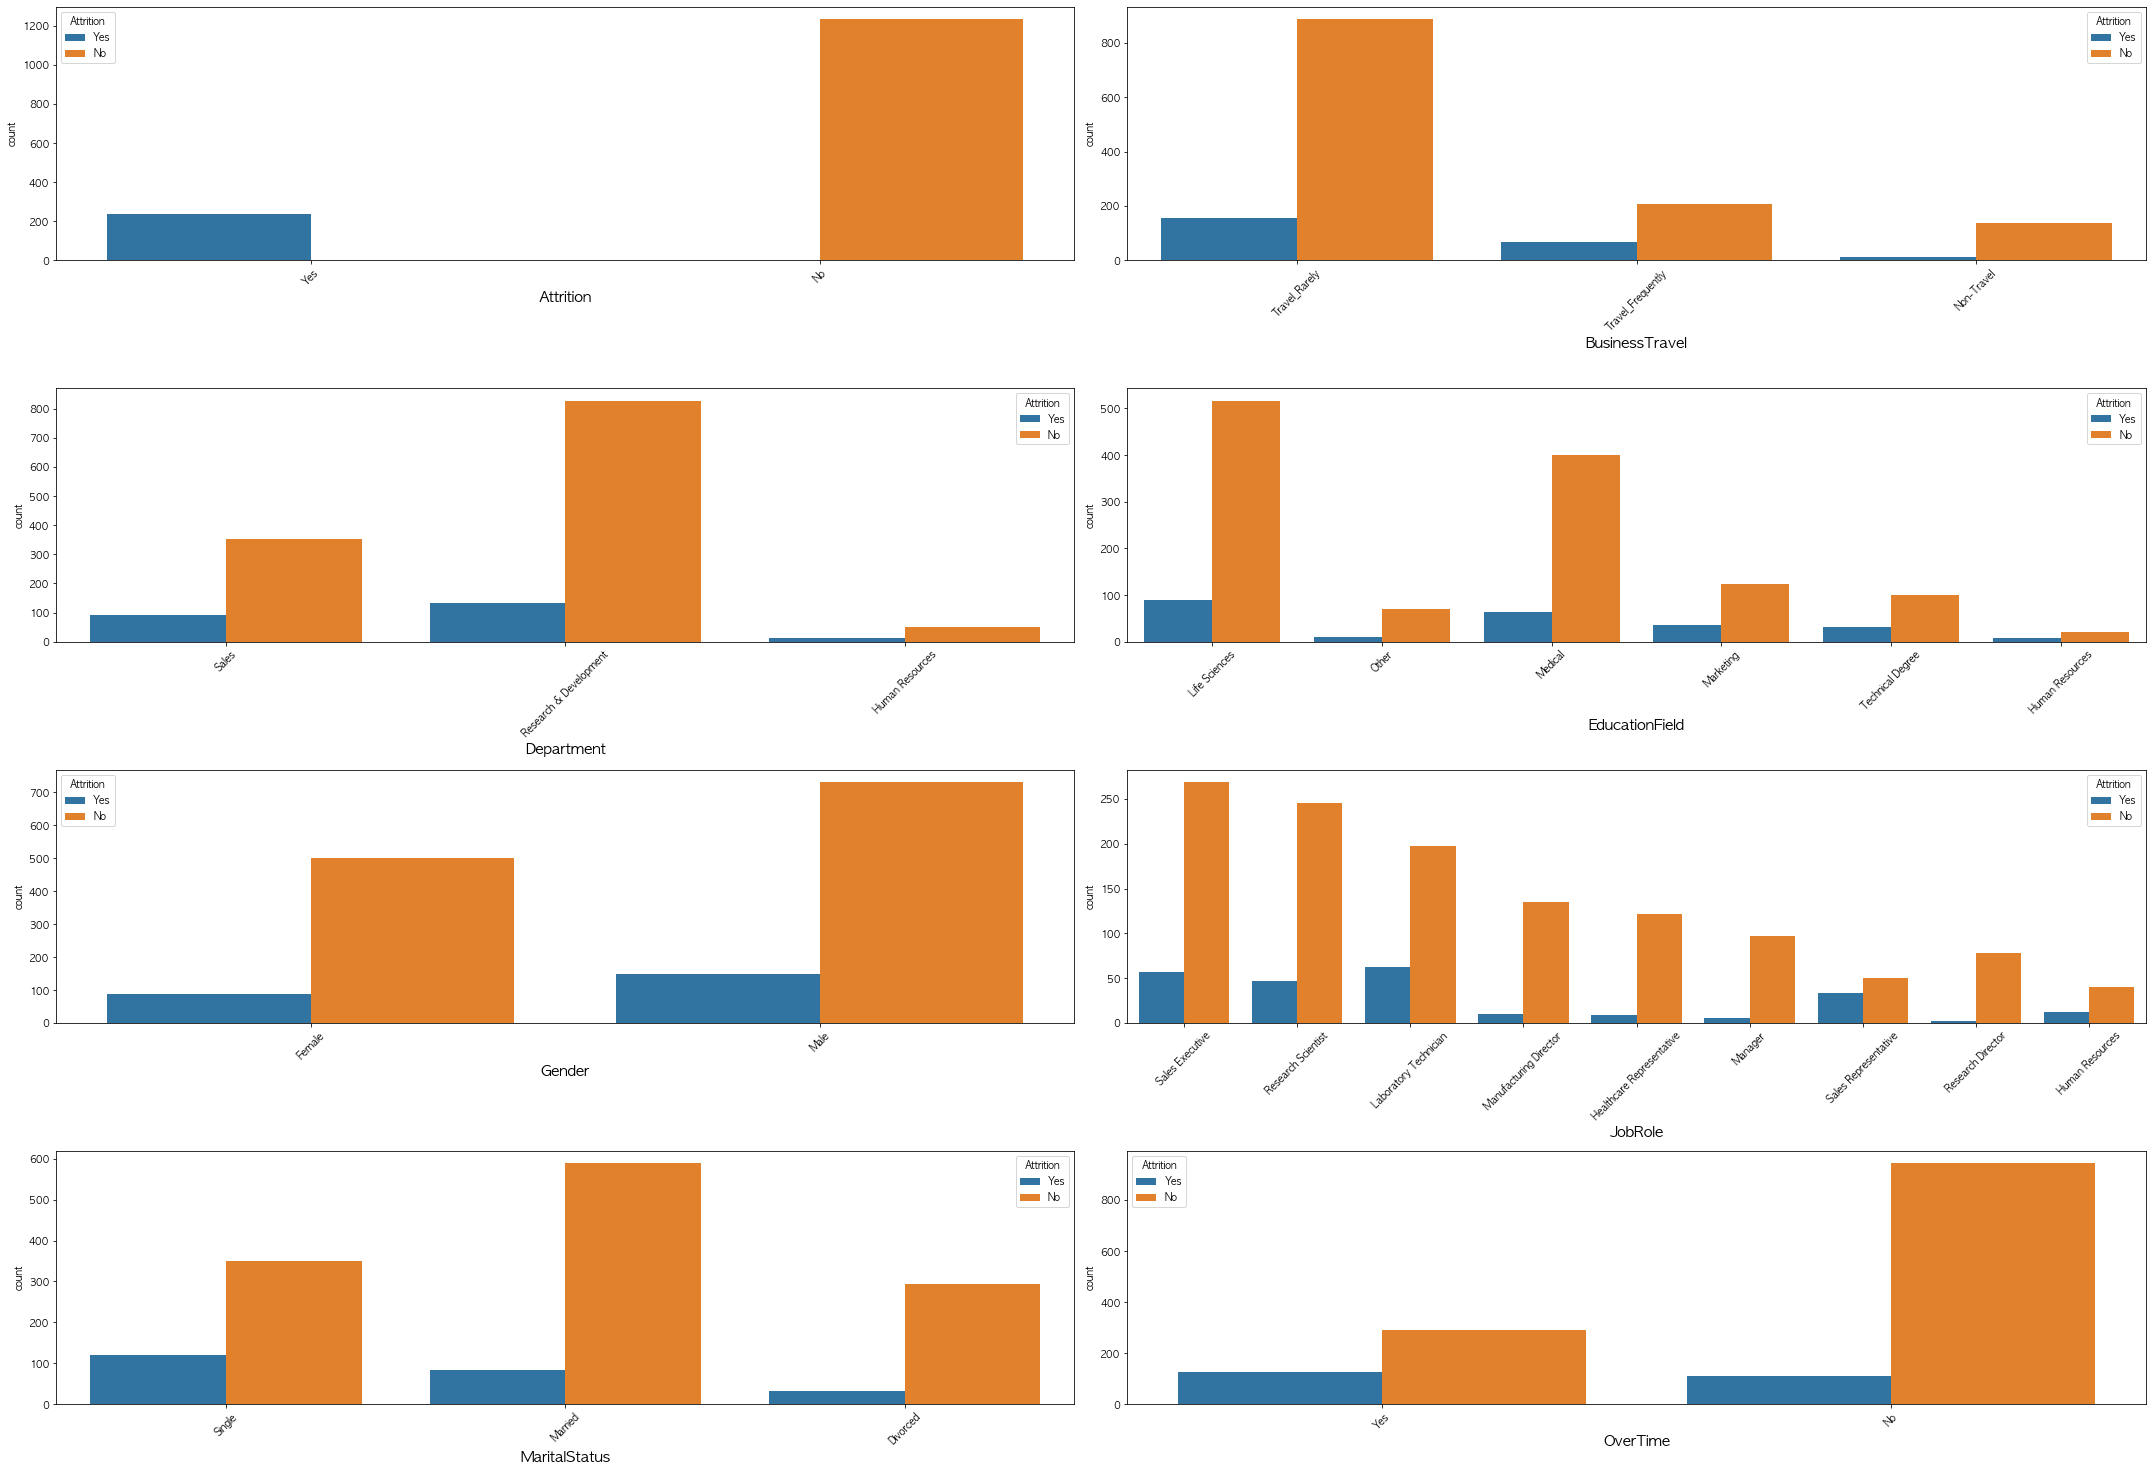

In [172]:
# 카테고리 변수 - 퇴사 여부

fig = plt.figure(figsize=(30,25))

l = 1
for i in range(len(object_col)):

    plt.subplot(5,2,l)
    sns.countplot(object_col[i],hue='Attrition',data=df)
    plt.xticks(rotation=45)
    plt.xlabel(object_col[i],fontsize=15)
    if l > 8:
        break
    l += 1
fig.tight_layout()
plt.show()

#### Int 형식 변수에 퇴사 퇴직 여부

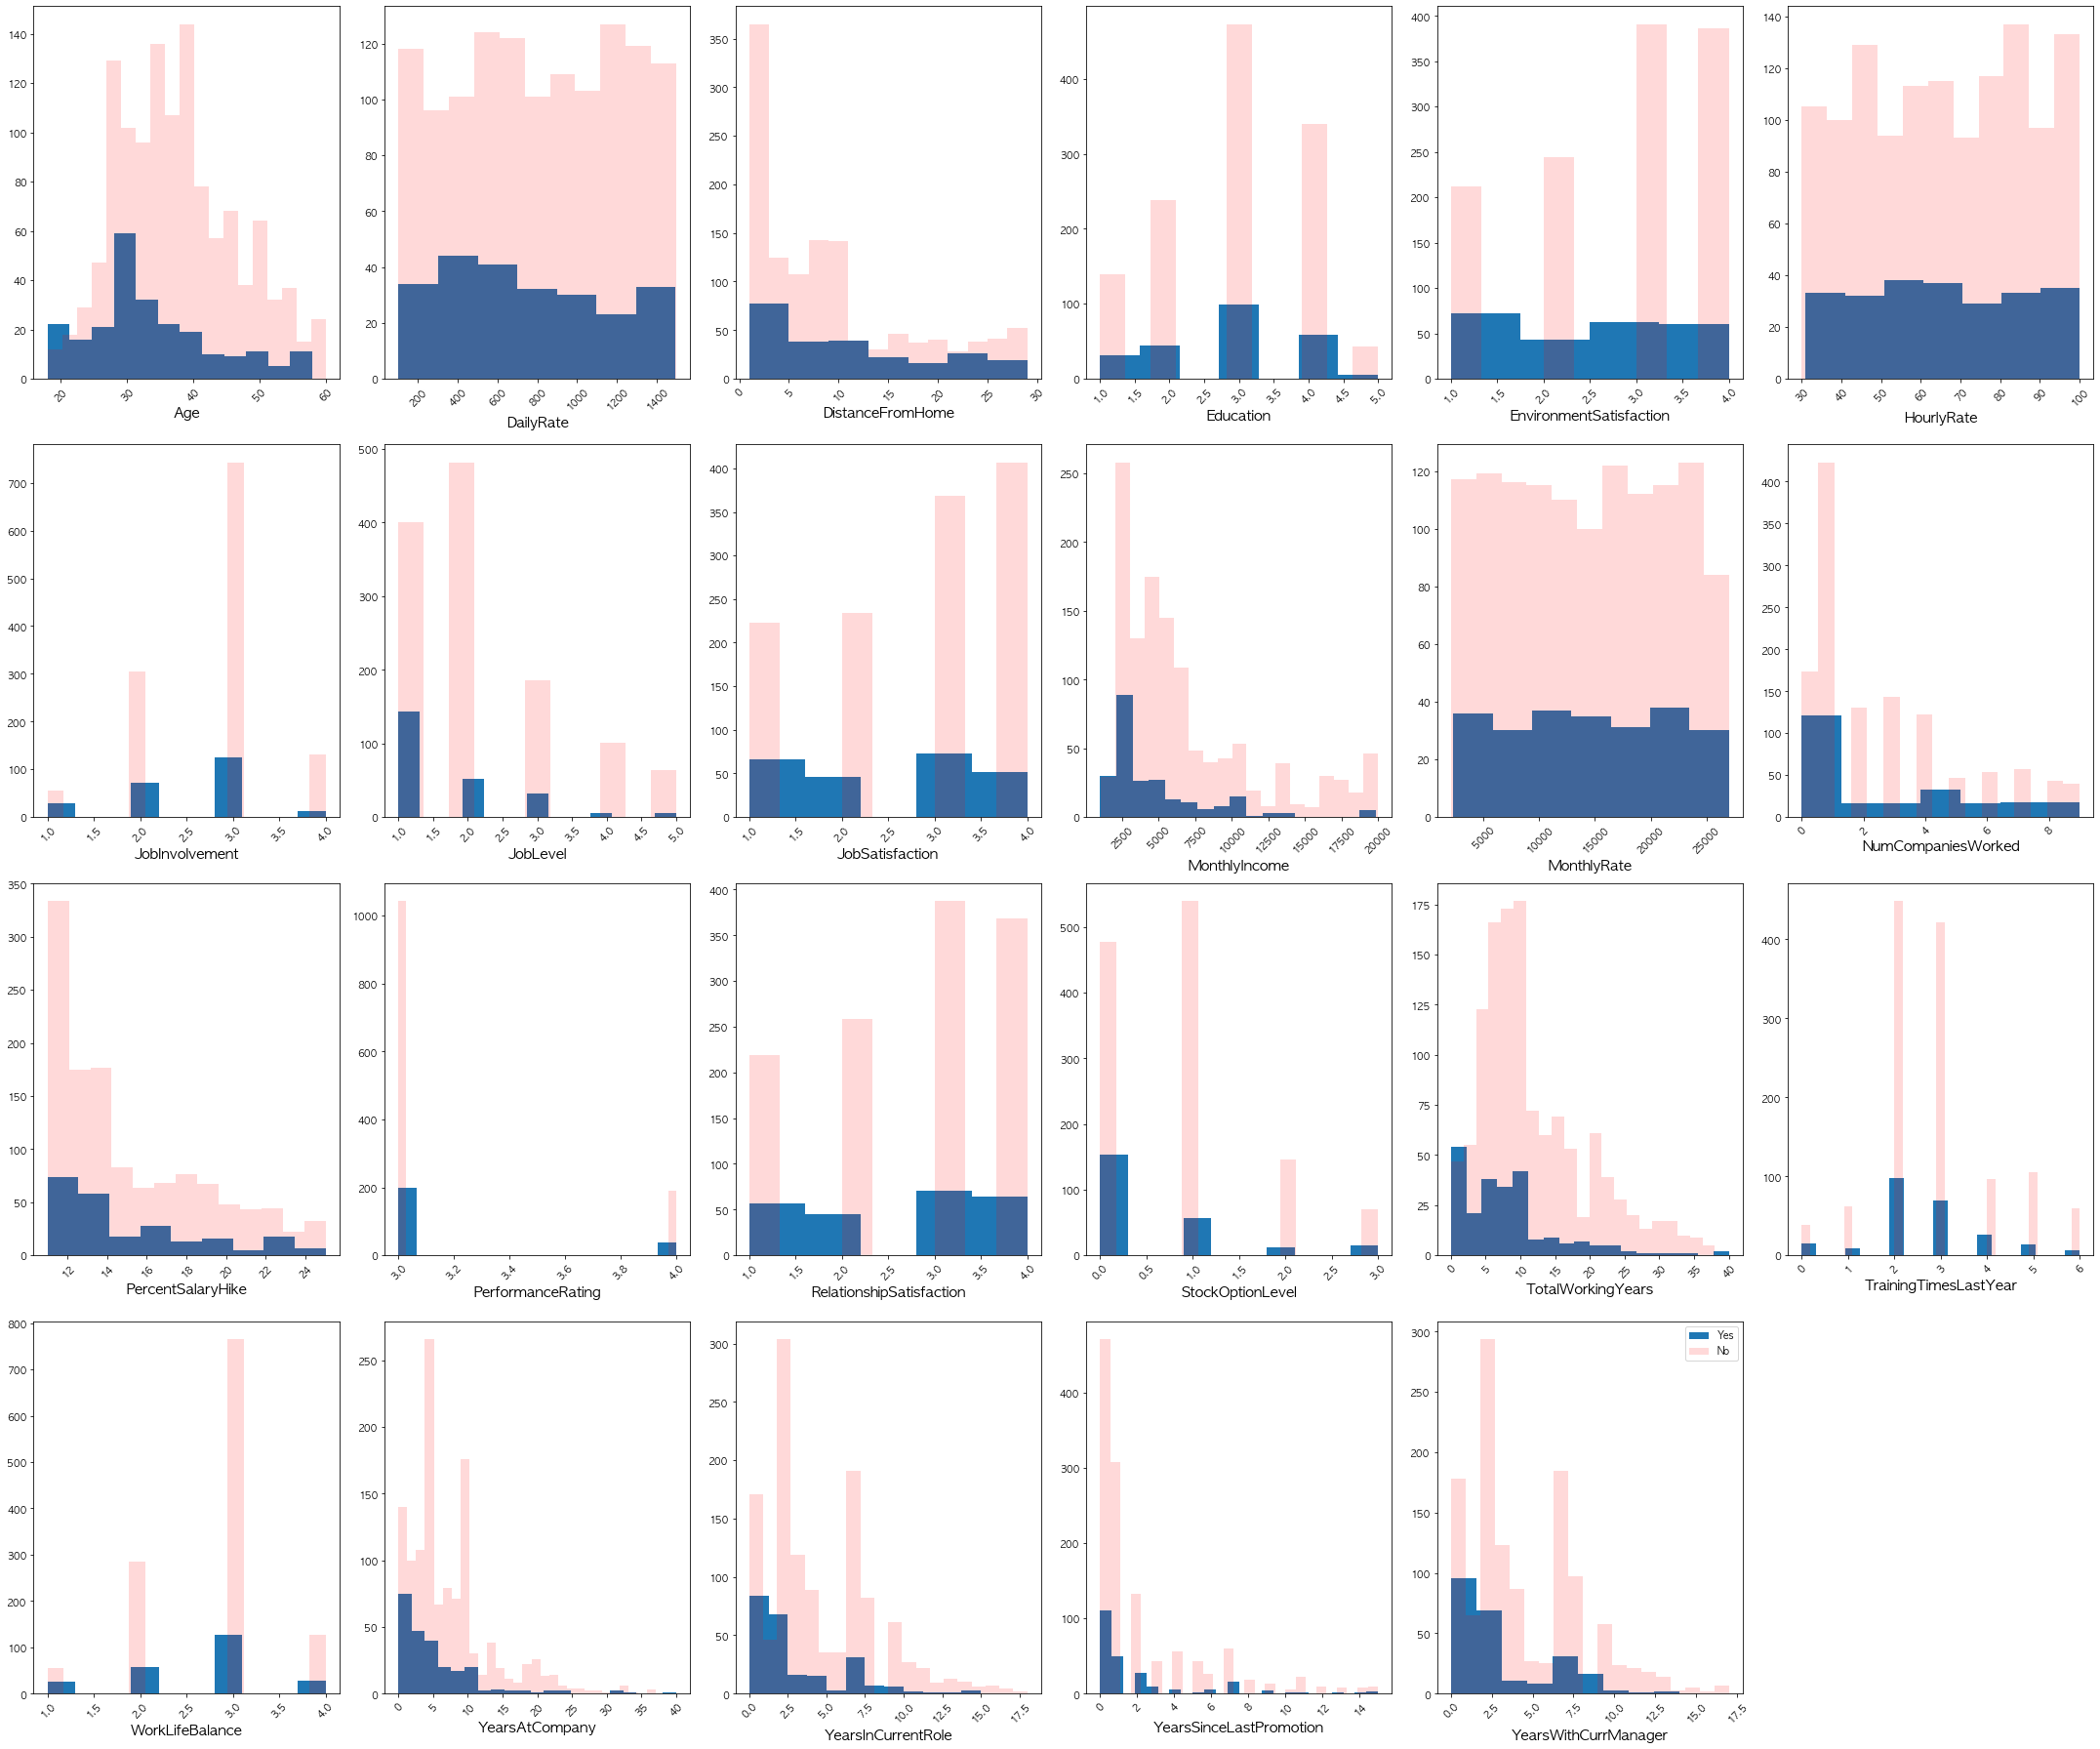

In [173]:
# int 변수 - 퇴사 여부

fig = plt.figure(figsize=(30,25))

l = 1
for i in range(len(int_col)):

    plt.subplot(4,6,l)
    sns.distplot(df[df['Attrition']=='Yes'][int_col[i]],kde=False,hist_kws=({'alpha':1}),label='Yes')
    sns.distplot(df[df['Attrition']=='No'][int_col[i]],kde=False,hist_kws=({'color':'red','alpha':0.15}),label='No')
    plt.xticks(rotation=45)
    plt.xlabel(int_col[i],fontsize=15)
    if l > 23:
        break
    l += 1
fig.tight_layout()
plt.legend()
plt.show()

* Int 형식 변수 그래프에서 Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
* Object 형식으로 변환

In [174]:
# int 변수 -> object 변수

df['Education'].replace({1:'Below College',2:'College',3:'Bachelor',4:'Master',5:'Doctor'},inplace=True)
df['EnvironmentSatisfaction'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},inplace=True)
df['JobInvolvement'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},inplace=True)
df['JobSatisfaction'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},inplace=True)
df['PerformanceRating'].replace({1:'Low',2:'Good',3:'Excellent',4:'Outstanding'},inplace=True)
df['RelationshipSatisfaction'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},inplace=True)
df['WorkLifeBalance'].replace({1:'Bad',2:'Good',3:'Better',4:'Best'},inplace=True)

df['JobLevel'] = df['JobLevel'].astype('object')
df['StockOptionLevel'] = df['StockOptionLevel'].astype('object')
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].astype('object')

In [175]:
# object 변수

object_col = []
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
print(object_col)
print('Object 형식 변수 :',len(object_col))

# int 변수

int_col = []
for i in df.columns:
    if df[i].dtype=='int64':
        int_col.append(i)
print(int_col)
print('Int 형식 변수:',len(int_col))

['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
Object 형식 변수 : 18
['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Int 형식 변수: 13


---

변수 형식 변환 후 시각화

* Object 형식 변수

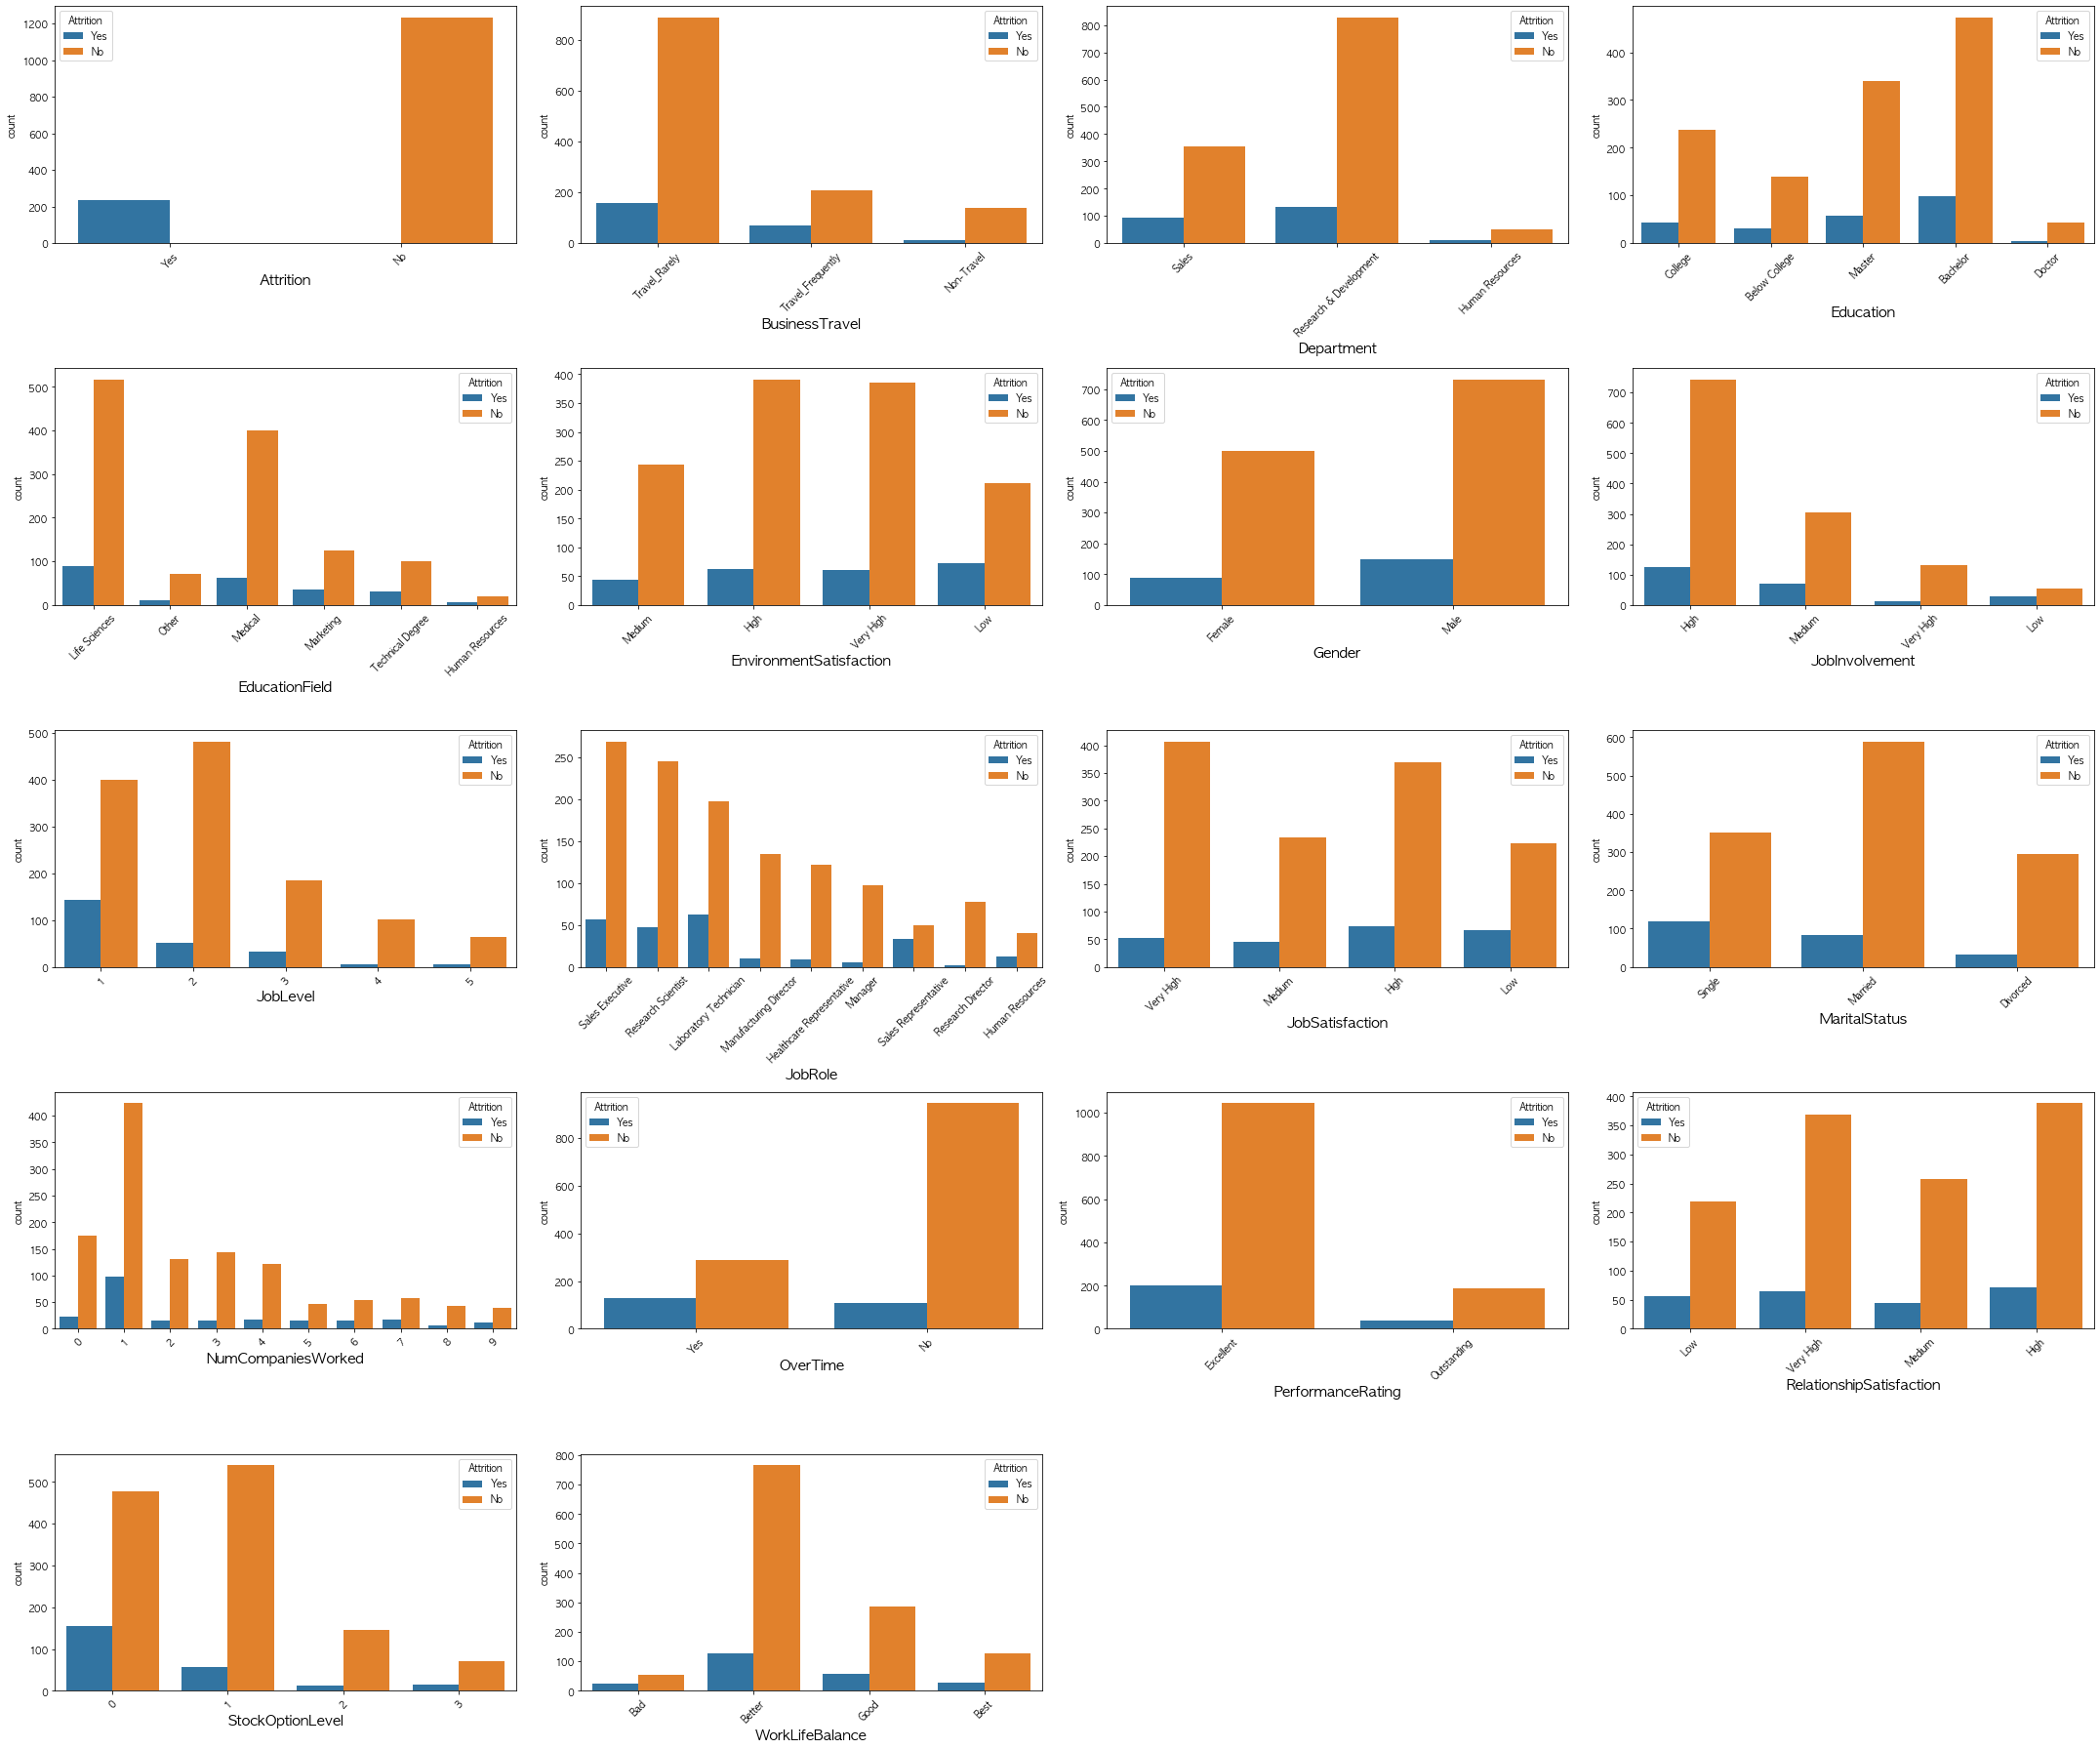

In [176]:
# 카테고리 변수 - 퇴사 여부

fig = plt.figure(figsize=(30,25))

l = 1
for i in range(len(object_col)):

    plt.subplot(5,4,l)
    sns.countplot(object_col[i],hue='Attrition',data=df)
    plt.xticks(rotation=45)
    plt.xlabel(object_col[i],fontsize=15)
    if l > 18:
        break
    l += 1
fig.tight_layout()
plt.show()

* Int 형식 변수

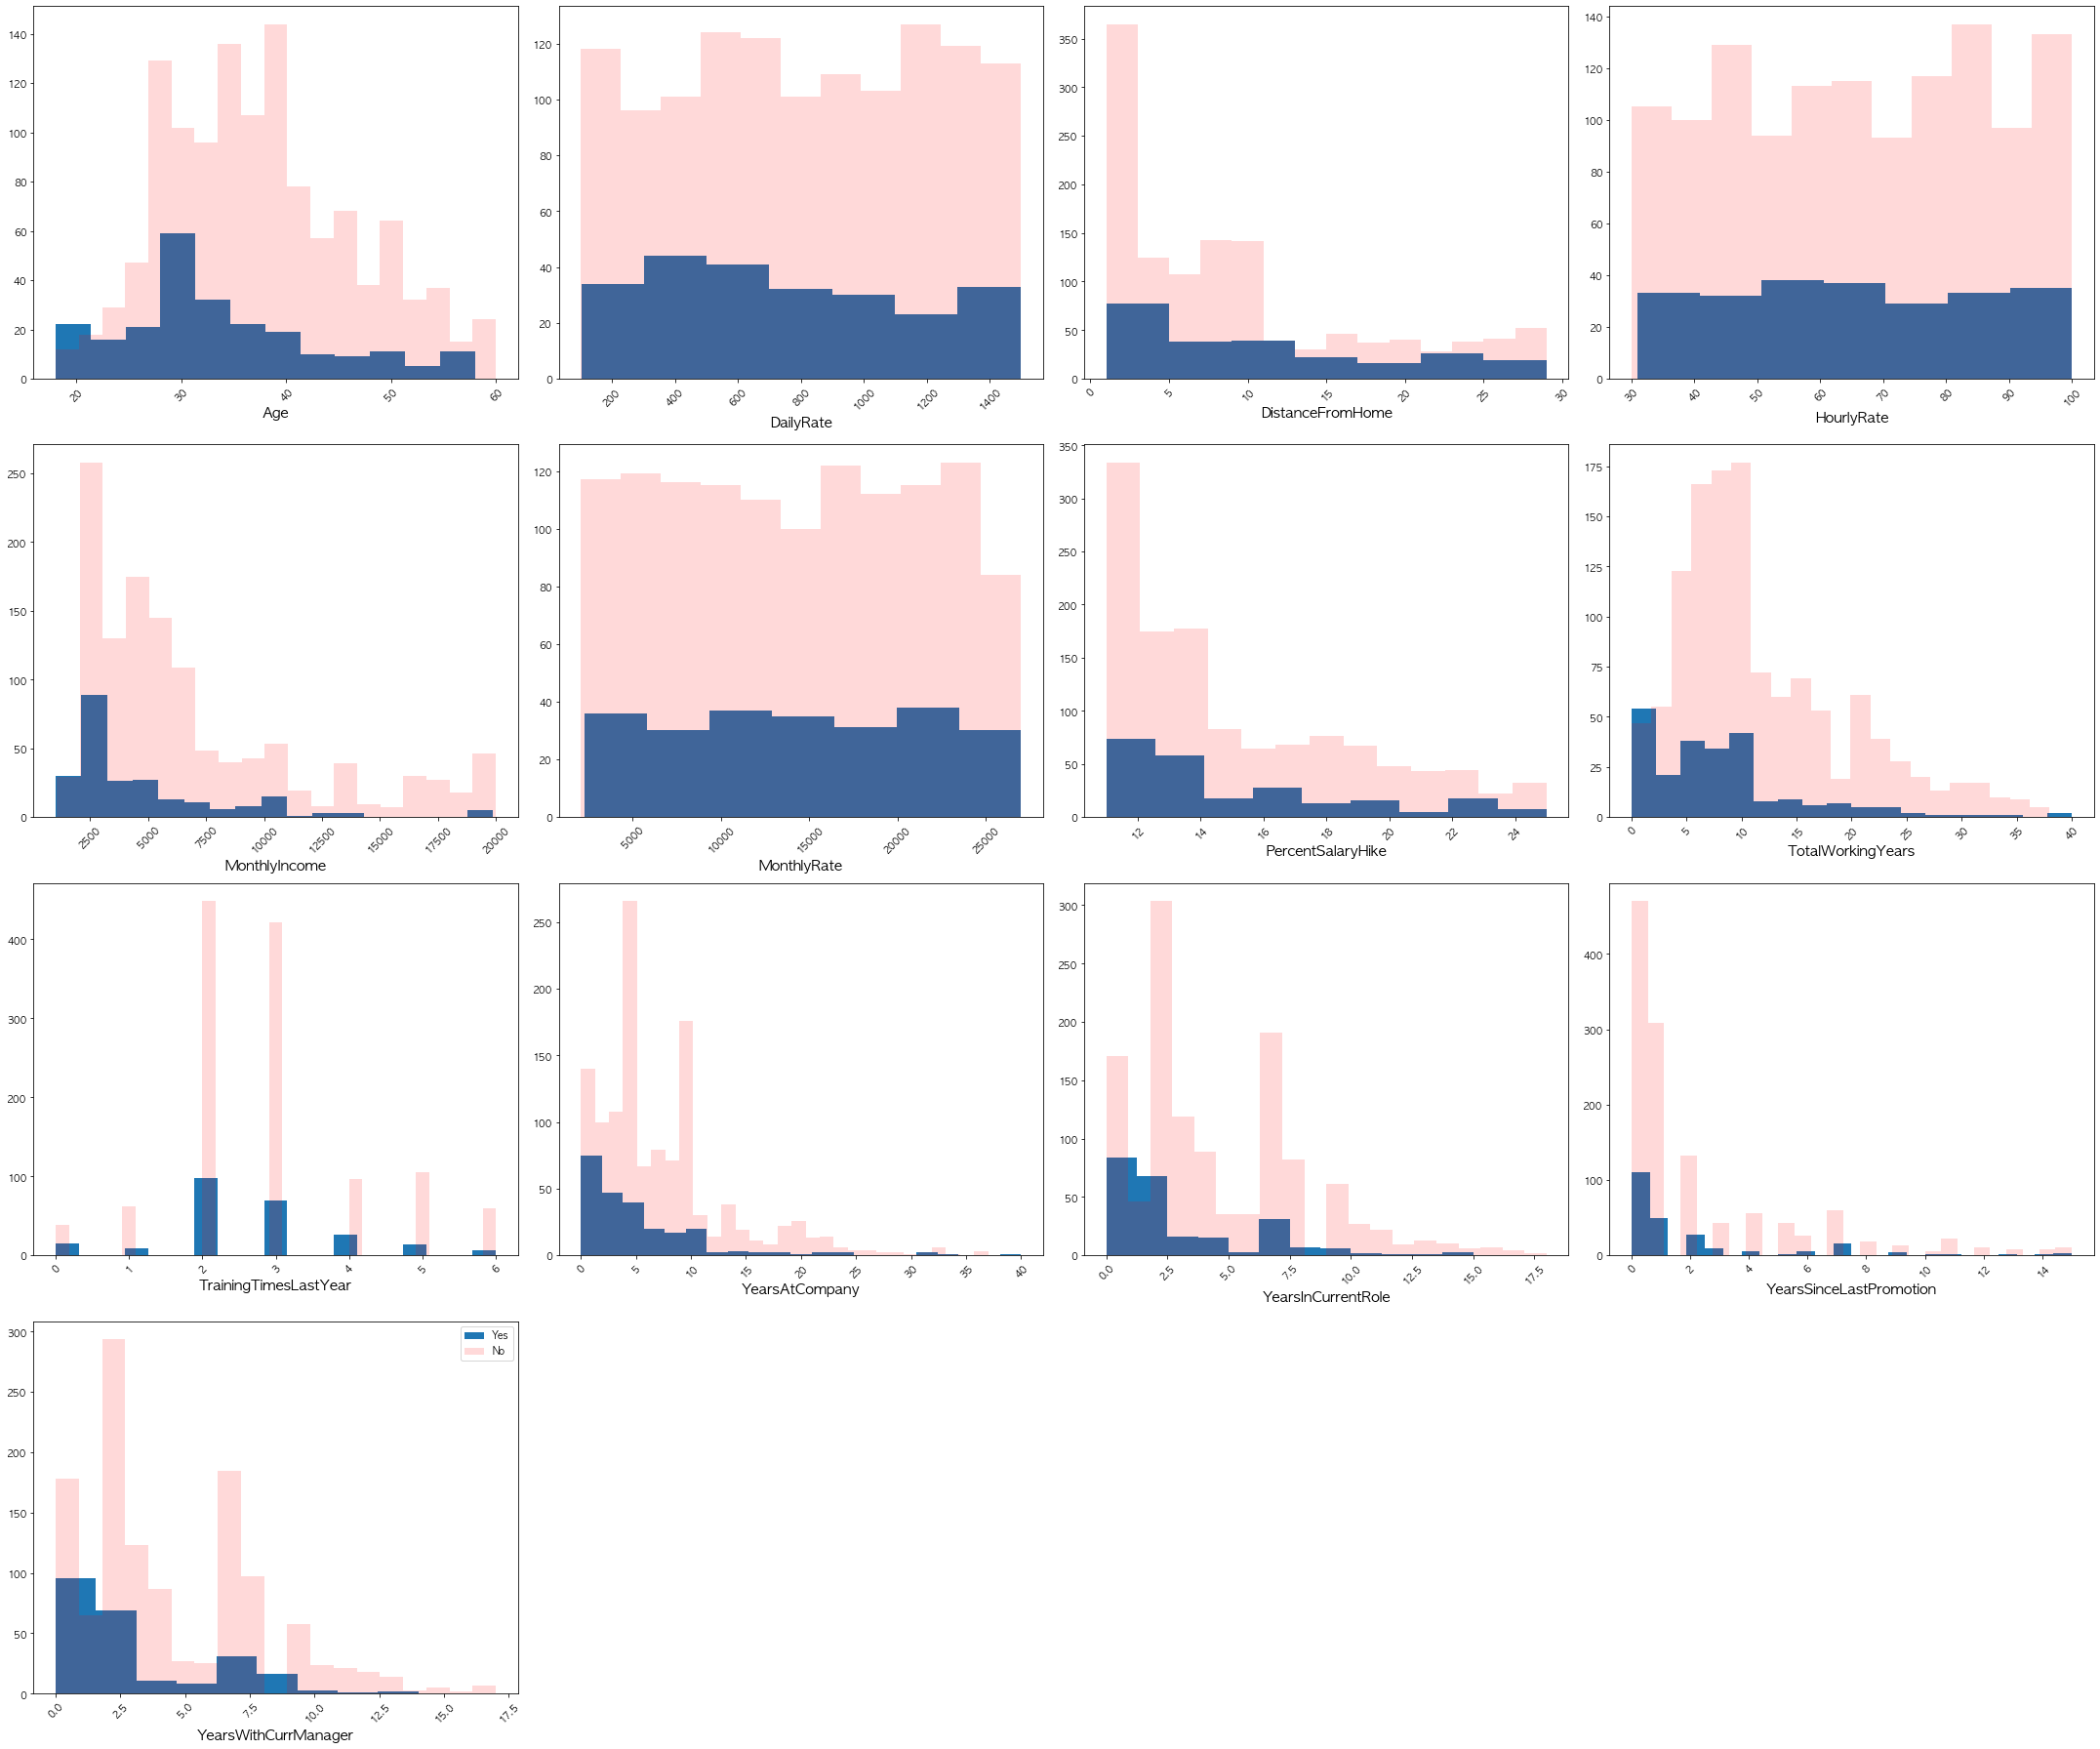

In [177]:
# 수치형 변수 - 퇴사 여부

fig = plt.figure(figsize=(30,25))

l = 1
for i in range(len(int_col)):

    plt.subplot(4,4,l)
    sns.distplot(df[df['Attrition']=='Yes'][int_col[i]],kde=False,hist_kws=({'alpha':1}),label='Yes')
    sns.distplot(df[df['Attrition']=='No'][int_col[i]],kde=False,hist_kws=({'color':'red','alpha':0.15}),label='No')
    plt.xticks(rotation=45)
    plt.xlabel(int_col[i],fontsize=15)
    if l > 13:
        break
    l += 1
fig.tight_layout()
plt.legend()
plt.show()

---
가설  

* 출장 빈도에 따른 퇴사율이 차이가 날것이다.  
* 부서별 퇴사율이 차이가 날것이다.  
* 월소득이 낮으면 퇴사가 많을것이다.  
* 업무환경, 업무만족도가 낮으면 퇴사가 많다.  
* 워라밸이 낮으면 퇴사가 많을것이다.  
* 결혼 여부에 따른 퇴사율이 차이가 날것이다.  
* 근속 연수가 짧으면 퇴사가 많다.  
* 경력 기간이 짧으면 퇴사가 많다.

---

퇴사 비율 그래프

In [178]:
# 퇴사 비율을 보기 위한 그래프 함수

def ratio_graph(col):
    
    def ratio_attrition_yes(col):
    
        a = df[df['Attrition']=='Yes'].groupby(df[col]).size()

        ratio = []
        for i in range(len(a)):
            temp = a[i]/len(df[df['Attrition']=='Yes'])
            ratio.append(temp)

        return ratio

    # 컬럼에 대한 미퇴직자 비율
    def ratio_attrition_no(col):
    
        b = df[df['Attrition']=='No'].groupby(df[col]).size()

        ratio = []
        for i in range(len(b)):
            temp = b[i]/len(df[df['Attrition']=='No'])
            ratio.append(temp)

        return ratio
    
    colors = sns.color_palette('Blues',len(df[col].unique()))
    
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.bar(df[df['Attrition']=='Yes'].groupby(df[col]).size().index,ratio_attrition_yes(col),color=colors)
    ax1.set_title('Attrition Yes',fontsize=12)
    ax2.bar(df[df['Attrition']=='No'].groupby(df[col]).size().index,ratio_attrition_no(col),color=colors)
    ax2.set_title('Attrition No',fontsize=12)
    
    for i, v in enumerate(df[df['Attrition']=='Yes'].groupby(df[col]).size().index):
        ax1.text(v,ratio_attrition_yes(col)[i],round(ratio_attrition_yes(col)[i]*100,1),
                 fontsize = 10,
                 color = 'black',
                 horizontalalignment='center',
                 verticalalignment='bottom')
        
    for i, v in enumerate(df[df['Attrition']=='No'].groupby(df[col]).size().index):
        ax2.text(v,ratio_attrition_no(col)[i],round(ratio_attrition_no(col)[i]*100,1),
                 fontsize = 10,
                 color = 'black',
                 horizontalalignment='center',
                 verticalalignment='bottom')
    plt.show()

  
  
#### 출장 빈도에 따른 퇴사율이 차이가 날것이다.

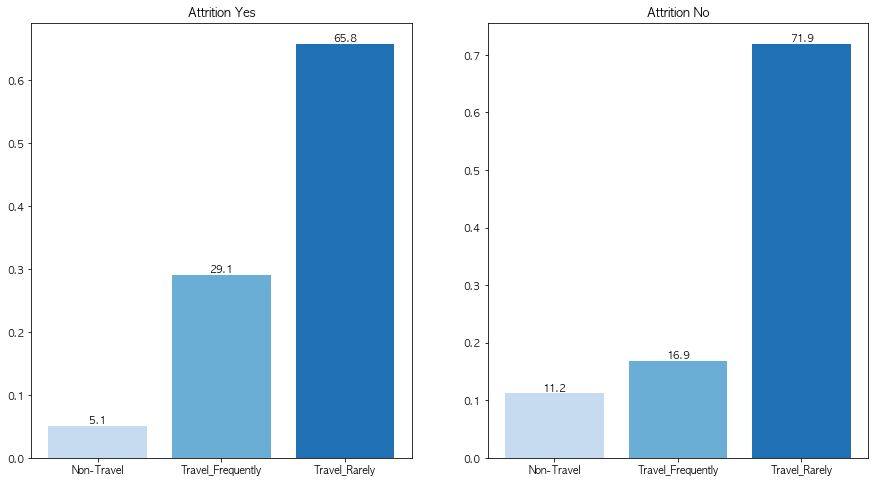

In [179]:
# 출장 빈도별 퇴사율 비교 그래프

ratio_graph('BusinessTravel')

* 출장을 자주 가는 사람의 퇴사비율이 높다. 

#### 부서별 퇴사율이 차이가 날것이다.

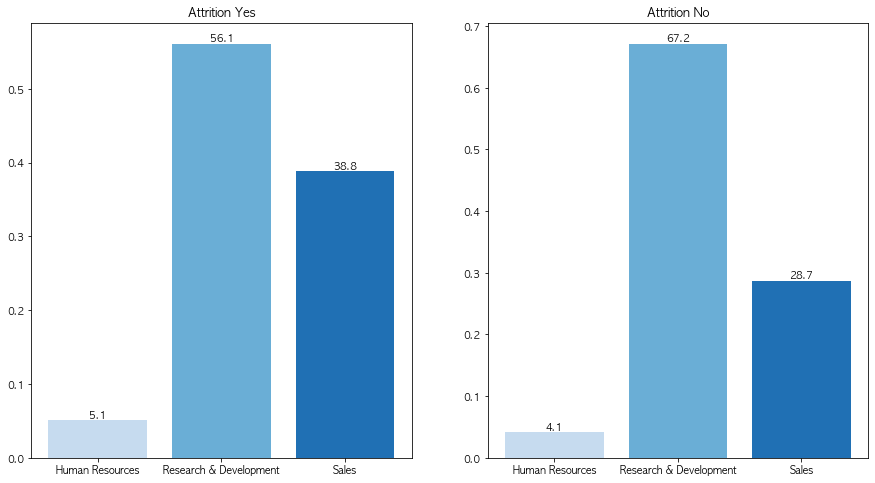

In [180]:
#부서별 퇴사율 비교 그래프

ratio_graph('Department')

* Sales 부서의 퇴사비율이 높다.  
* R&D 부서의 퇴사비율이 높은 이유는 직원의 수가 많기 때문이다.

#### 부서별 퇴사율이 차이가 날것이다.

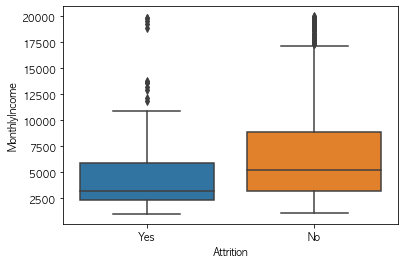

In [181]:
# 퇴사 여부에 따른 월 소득 차이 그래프

sns.boxplot(df['Attrition'],df['MonthlyIncome'],data=df)
plt.show()

* 퇴사자들의 월 소득은 퇴사 하지 않은 직원들보다 더 적다

#### 업무환경만족도가 낮으면 퇴사가 많다.

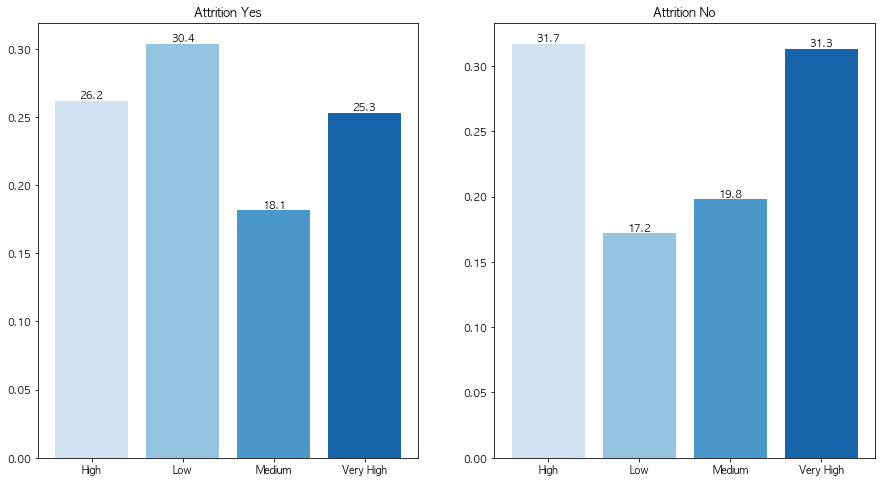

In [182]:
#업무환경만족도별 퇴사율 비교 그래프

ratio_graph('EnvironmentSatisfaction')

* 퇴사자들의 업무환경만족도 중 Low는 30.4%로 제일 높다.  
* 퇴사를 하지 않은 사람들의 업무환경만족도 중 High,Very High는 30%을 넘는다.

#### 업무만족도가 낮으면 퇴사가 많다.

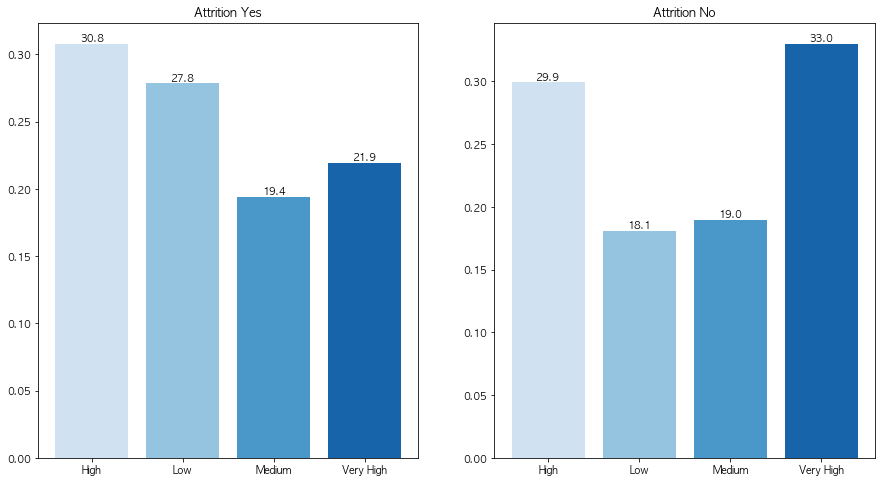

In [183]:
#업무만족도별 퇴사율 비교 그래프.

ratio_graph('JobSatisfaction')

* 퇴사자들의 업무환경만족도 중 High는 30.8%로 제일 높고 Low 역시 27.8%로 높다.  
* 퇴사를 하지 않은 사람들의 업무환경만족도 중 High,Very High는 30%이상을 차지한다.  
* 업무만족도는 퇴사에 영향을 크게 끼치지 않는다.

#### 워라밸이 낮으면 퇴사가 많을것이다.

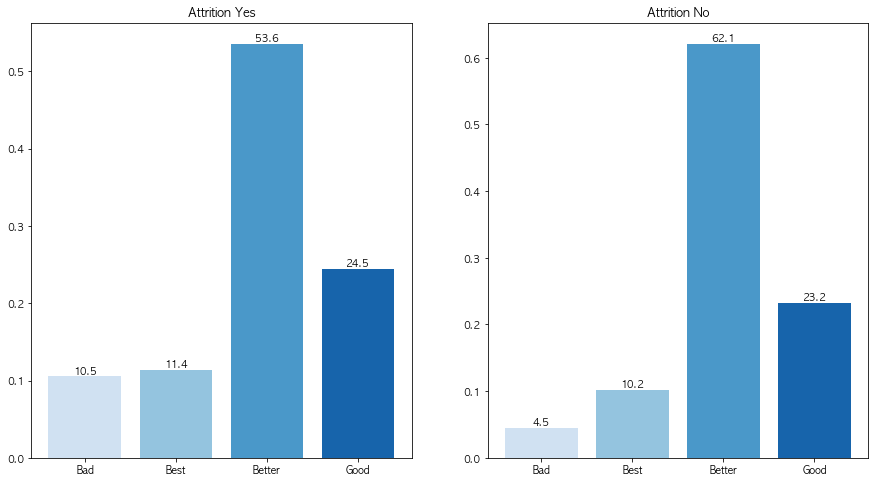

In [184]:
#워라밸별 퇴사율 비교 그래프.  

ratio_graph('WorkLifeBalance')

* 워라밸이 Bad인 직원의 퇴사율 두 배 넘게 차이난다.
* 워라밸이 Best인 직원의 퇴사율은 크게 차이가 없다.
* 워라밸은 퇴사율에 영향을 끼친다고 볼 수 있다.

#### 결혼 여부에 따른 퇴사율이 차이가 날것이다.

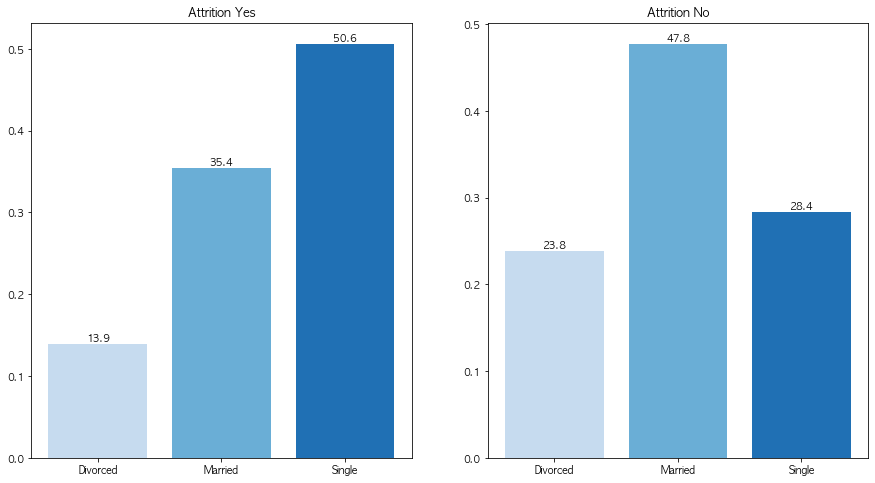

In [185]:
#결혼 여부에 따른 퇴사율 비교 그래프.

ratio_graph('MaritalStatus')

* 퇴사자들 중 미혼, 이혼의 비율은 64.5%, 기혼의 비율은 35.4%이다.  
* 퇴사를 하지 않는 사람들 중 미혼, 이혼의 비율은 52.2%, 기혼의 비율은 47.8%이다.
* 결혼 여부는 퇴사율에 영향을 끼친다고 볼 수 있다.

#### 근속 연수가 짧으면 퇴사가 많다.

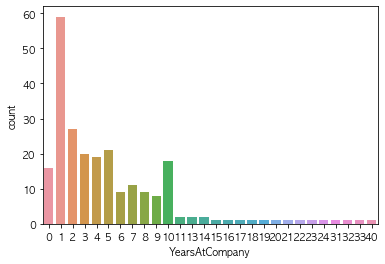

In [186]:
# 근속 연수에 따른 퇴사 인원 수 비교 그래프.

sns.countplot(df[df['Attrition']=='Yes']['YearsAtCompany'],data=df)
plt.show()

* 근속 연수가 짧은 사람들이 퇴사를 많이 한다.

#### 경력 기간이 짧으면 퇴사가 많다.

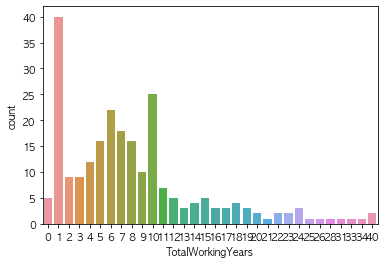

In [187]:
# 경력 기간에 따른 퇴사 인원 수 비교 그래프.

sns.countplot(df[df['Attrition']=='Yes']['TotalWorkingYears'],data=df)
plt.show()

* 경력 기간이 짧은 사람들이 퇴사를 많이 한다.
* 경력 기간이 10년인 사람들의 퇴사가 높다.

---

#### 이상 데이터 확인

* 일한 회사의 수가 0개?

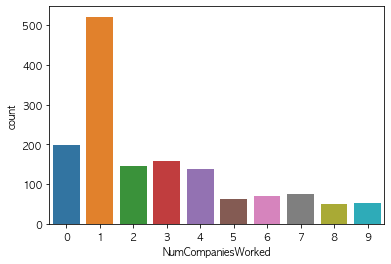

In [188]:
sns.countplot(df['NumCompaniesWorked'],data=df)
plt.show()

In [189]:
#일한 회사가 0개인데 경력기간과 근속연수가 같은 사람은 없다 -> 0개가 첫회사면 경력기간과 근속연수가 같아야한다.
print(len(df[(df['NumCompaniesWorked']==0) & (df['TotalWorkingYears'] == df['YearsAtCompany'])]))

0


* 일한 회사의 수가 0개 이면서 경력기간과 근속연수가 같은 직원의 수 : 0명

In [190]:
# 일한 회사가 1개인데 경력기간과 근속연수가 같은 사람은 474명 -> 0개가 첫회사라면 이사람들은 회사가 2개니까 경력기간과 근속연수가 같으면 안된다.
print(len(df[(df['NumCompaniesWorked']==1) & (df['TotalWorkingYears'] == df['YearsAtCompany'])]))

474


* 0개가 첫회사면 일한회사가 1개인 사람들은 경력기간과 근속연수가 같으면 안된다.
* 일한 회사의 수가 1개 이면서 경력기간과 근속연수가 같은 직원의 수 :474명

In [191]:
# 일한 회사가 1개면서 경력기간과 근속연수가 다른 사람은 47명 -> 근속연수가 1년이 되지 않았지만 햇수로 입사한지 1년이 넘은 사람들로 예상
len(df[(df['NumCompaniesWorked']==1) & (df['TotalWorkingYears'] != df['YearsAtCompany'])])

47

* 일한 회사의 수가 1개이면서 경력기간과 근속연수가 다른 직원의 수 :47명  
* 근속연수가 1년이 되지 않았지만 햇수로 입사한 지 1년이 넘은 직원으로 예상

In [192]:
# 일한 회사가 0개면서 경력기간과 근속연수가 다른 사람은 197명
print(len(df[(df['NumCompaniesWorked']==0) & (df['TotalWorkingYears'] != df['YearsAtCompany'])]))

# 경력기간과 근속연수가 같은 사람의 일한 회사 수는 1개 -> 첫 회사가 IBM
df[df['TotalWorkingYears'] == df['YearsAtCompany']]['NumCompaniesWorked'].head()

197


1     1
3     1
7     1
12    1
15    1
Name: NumCompaniesWorked, dtype: object

* 일한 회사가 0개면서 경력기간과 근속연수가 다른 직원의 수 : 197명
  
* 경력기간과 근속연수가 같은 사람의 일한 회사의 수는 1개
* 일한 회사가 0개인 직원들을 1씩 더해서 오류 제거

In [193]:
# 일한 회사가 0개인 직원들의 오류 제거

df['NumCompaniesWorked'].replace(0,1,inplace=True)

#### 수치형 변수들의 이상치 확인

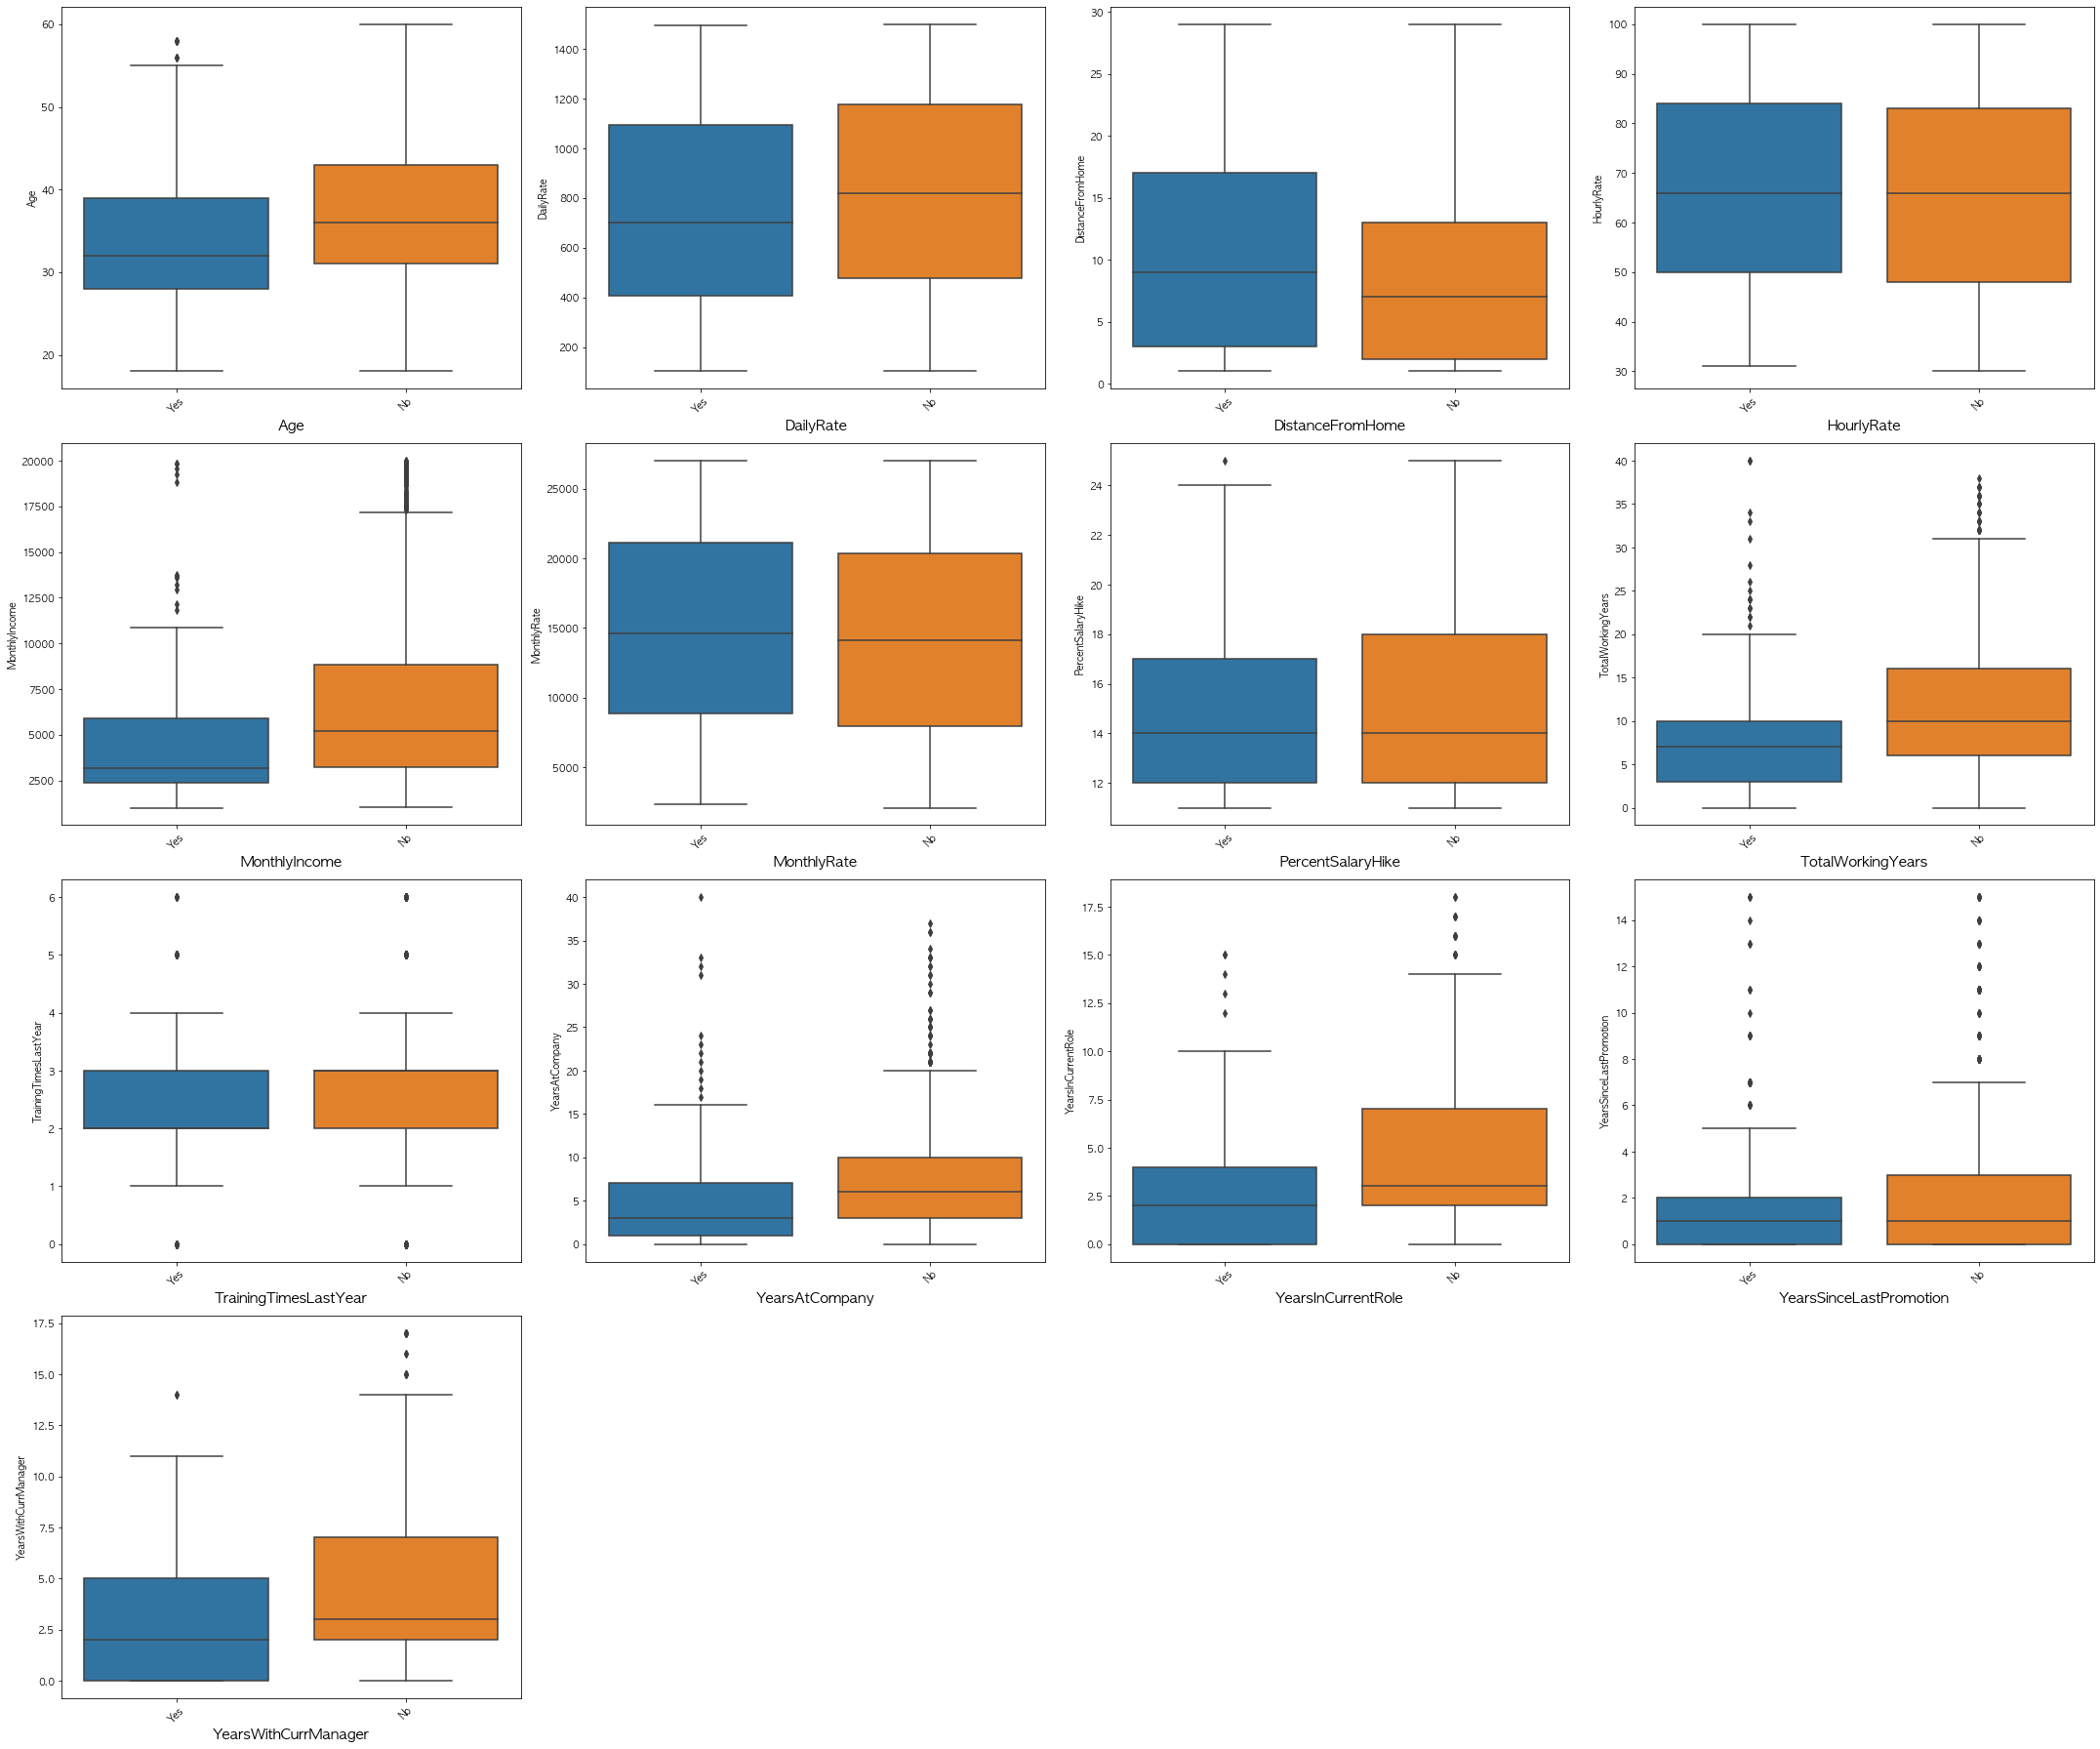

In [194]:
# 수치형 변수 - 이상치 확인

fig = plt.figure(figsize=(30,25))

l = 1
for i in range(len(int_col)):

    plt.subplot(4,4,l)
    sns.boxplot(df['Attrition'],df[int_col[i]],data=df)
    plt.xticks(rotation=45)
    plt.xlabel(int_col[i],fontsize=15)
    if l > 13:
        break
    l += 1
fig.tight_layout()
plt.show()

* 수치형 변수에 대해서 이상치 확인, 제거

In [195]:
# MonthlyIncome 이상치
q1 = np.percentile(df['MonthlyIncome'],25)
q3 = np.percentile(df['MonthlyIncome'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
monthlyincome_outlier = df[(df['MonthlyIncome'] < lf) | (df['MonthlyIncome'] > uf)]

# TotalWorkingYears 이상치
q1 = np.percentile(df['TotalWorkingYears'],25)
q3 = np.percentile(df['TotalWorkingYears'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
totalworkingyears_outlier = df[(df['TotalWorkingYears'] < lf) | (df['TotalWorkingYears'] > uf)]

# TrainingTimesLastYear 이상치
q1 = np.percentile(df['TrainingTimesLastYear'],25)
q3 = np.percentile(df['TrainingTimesLastYear'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
trainingtimeslastyear_outlier = df[(df['TrainingTimesLastYear'] < lf) | (df['TrainingTimesLastYear'] > uf)]

# YearsAtCompany 이상치
q1 = np.percentile(df['YearsAtCompany'],25)
q3 = np.percentile(df['YearsAtCompany'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
yearsatcompany_outlier = df[(df['YearsAtCompany'] < lf) | (df['YearsAtCompany'] > uf)]

# YearsInCurrentRole 이상치
q1 = np.percentile(df['YearsInCurrentRole'],25)
q3 = np.percentile(df['YearsInCurrentRole'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
yearsincurrentrole_outlier = df[(df['YearsInCurrentRole'] < lf) | (df['YearsInCurrentRole'] > uf)]

# YearsSinceLastPromotion 이상치
q1 = np.percentile(df['YearsSinceLastPromotion'],25)
q3 = np.percentile(df['YearsSinceLastPromotion'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
yearssincelastpromotion_outlier = df[(df['YearsSinceLastPromotion'] < lf) | (df['YearsSinceLastPromotion'] > uf)]

# YearsWithCurrManager 이상치
q1 = np.percentile(df['YearsWithCurrManager'],25)
q3 = np.percentile(df['YearsWithCurrManager'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
yearswithcurrmanager_outlier = df[(df['YearsWithCurrManager'] < lf) | (df['YearsWithCurrManager'] > uf)]

#### 이상치 데이터 제거

In [196]:
outlier = pd.concat([monthlyincome_outlier,totalworkingyears_outlier,trainingtimeslastyear_outlier,yearsatcompany_outlier,yearsincurrentrole_outlier,yearssincelastpromotion_outlier,yearswithcurrmanager_outlier]).drop_duplicates()

df.drop(index=outlier.index,inplace=True)

In [197]:
len(df)

1024

---

### 예측 모델링

In [198]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import graphviz
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb

* 변수 스케일링 및 라벨인코더

In [199]:
# 스케일링 및 라벨인코더

df[int_col] = StandardScaler().fit_transform(df[int_col])

object_le = LabelEncoder()
df[object_col].apply(object_le.fit_transform)

x = pd.concat([df[object_col].apply(object_le.fit_transform),df[int_col]],axis=1)

In [200]:
# target data(종속변수)

target = x['Attrition']
x.drop('Attrition',axis=1,inplace=True)

* train, test set 분리

In [201]:
# train , test set 분리

x_train, x_test, y_train, y_test = train_test_split(x,target,test_size=0.2,random_state=42)

---

#### LogisticRegression Model

In [202]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)

# 정확도 저장
accuracy = []
accuracy.append({'model':'LogisticRegression',
                 'accuracy':round(accuracy_score(y_test,y_pred),2)})

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       174
           1       0.90      0.29      0.44        31

    accuracy                           0.89       205
   macro avg       0.89      0.64      0.69       205
weighted avg       0.89      0.89      0.86       205



* LogisticRegression Model 변수 중요도

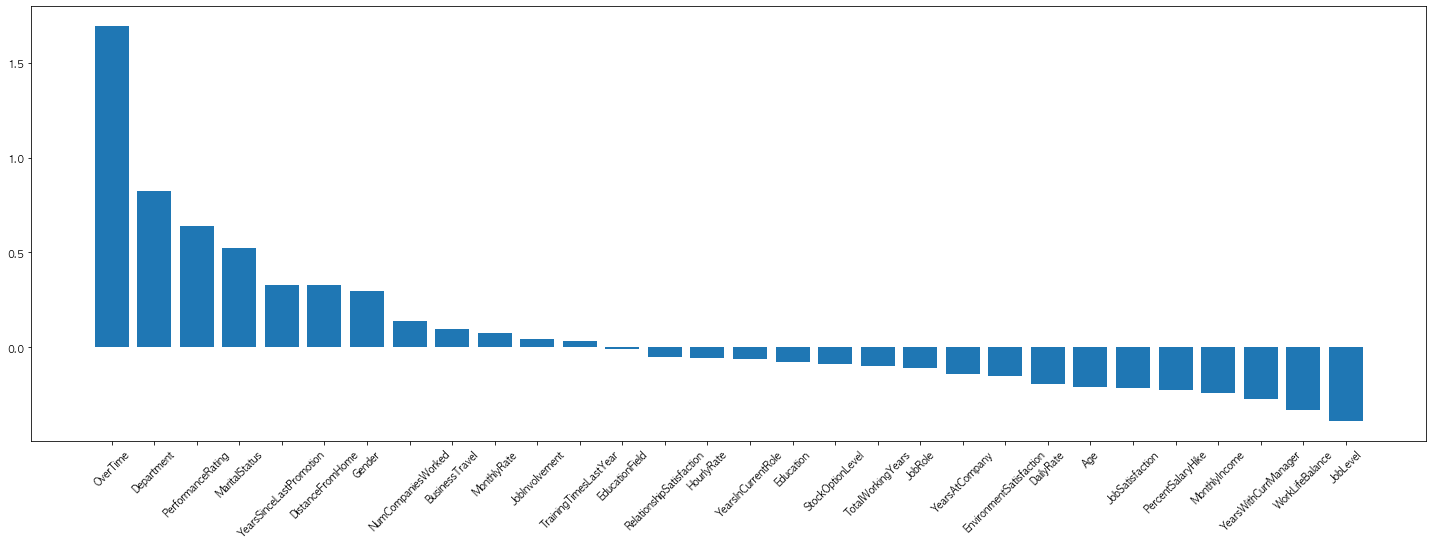

In [203]:
# LogisticRegression Model의 변수 중요도
pd.DataFrame({'feature':x.columns, 'importance':lr_model.coef_[0]}).sort_values(by='importance',ascending=False).T
lr_imp = pd.DataFrame({'feature':x.columns, 'importance':lr_model.coef_[0]}).sort_values(by='importance',ascending=False)

fig = plt.figure(figsize=(25,8))
plt.bar(lr_imp['feature'],lr_imp['importance'])
plt.xticks(rotation=45)
plt.show()

---

#### DecisionTree Model

In [204]:
clf_model = DecisionTreeClassifier()
clf_model.fit(x_train,y_train)
y_pred = clf_model.predict(x_test)

# 정확도 저장
accuracy.append({'model':'DecisionTreeClassifier',
                 'accuracy':round(accuracy_score(y_test,y_pred),2)})

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       174
           1       0.31      0.35      0.33        31

    accuracy                           0.78       205
   macro avg       0.59      0.61      0.60       205
weighted avg       0.79      0.78      0.79       205



* DecisionTree Model 변수 중요도

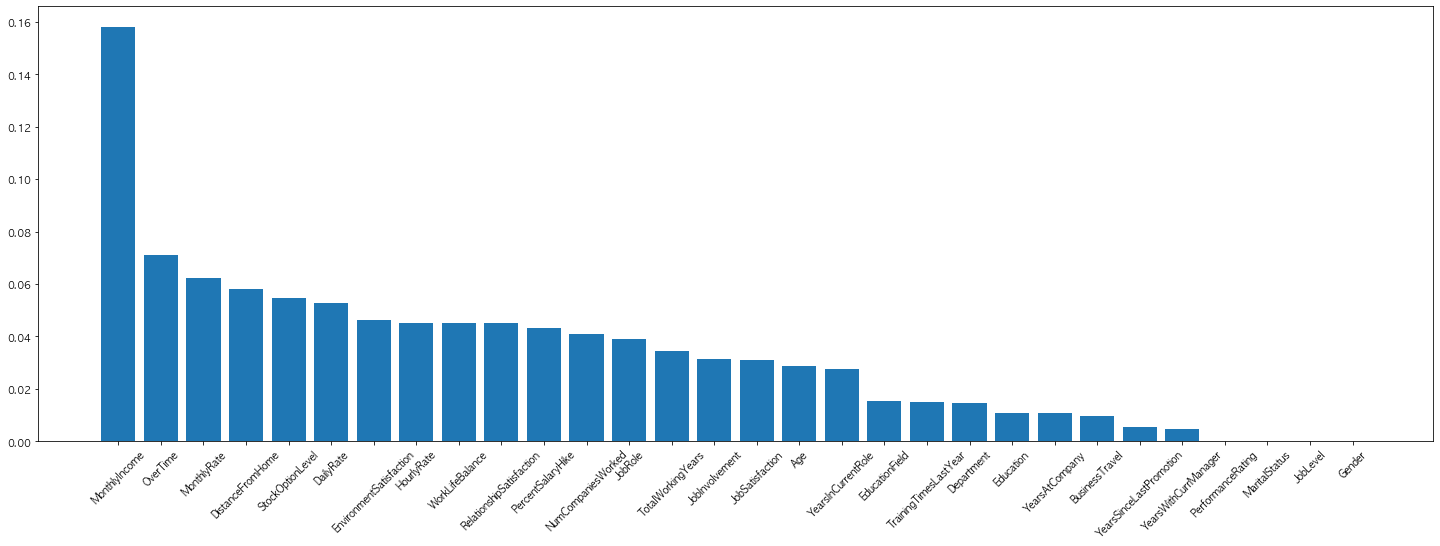

In [205]:
# DesisionTree Model 변수 중요도

pd.DataFrame({'feature':x.columns, 'importance':clf_model.feature_importances_}).sort_values(by='importance',ascending=False).T
clf_imp = pd.DataFrame({'feature':x.columns, 'importance':clf_model.feature_importances_}).sort_values(by='importance',ascending=False)

fig = plt.figure(figsize=(25,8))
plt.bar(clf_imp['feature'],clf_imp['importance'])
plt.xticks(rotation=45)
plt.show()

---

#### RandomForest Model

In [206]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)

# 정확도 저장
accuracy.append({'model':'RandomForestClassifier',
                 'accuracy':round(accuracy_score(y_test,y_pred),2)})

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       174
           1       1.00      0.19      0.32        31

    accuracy                           0.88       205
   macro avg       0.94      0.60      0.63       205
weighted avg       0.89      0.88      0.84       205



* RandomForest Model 변수 중요도

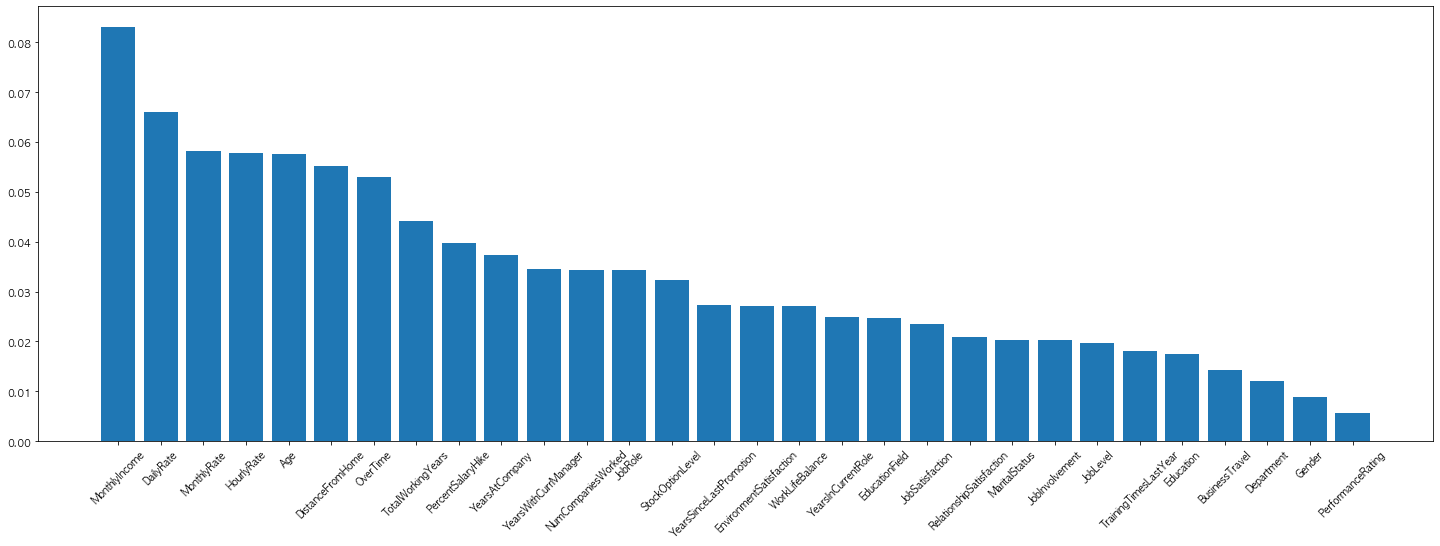

In [207]:
# RandomForest Model 변수 중요도

pd.DataFrame({'feature':x.columns, 'importance':rf_model.feature_importances_}).sort_values(by='importance',ascending=False).T
rf_imp = pd.DataFrame({'feature':x.columns, 'importance':rf_model.feature_importances_}).sort_values(by='importance',ascending=False)

fig = plt.figure(figsize=(25,8))
plt.bar(rf_imp['feature'],rf_imp['importance'])
plt.xticks(rotation=45)
plt.show()

---

#### XGBoost

In [208]:
# xgboost 모델

xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train,y_train)
y_pred = xgb_model.predict(x_test)

# 정확도 저장
accuracy.append({'model':'XGBClassifier',
                 'accuracy':round(accuracy_score(y_test,y_pred),2)})

print(classification_report(y_test,y_pred))

[11:36:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       174
           1       0.75      0.29      0.42        31

    accuracy                           0.88       205
   macro avg       0.82      0.64      0.68       205
weighted avg       0.87      0.88      0.85       205



* XGBoost Model 변수 중요도

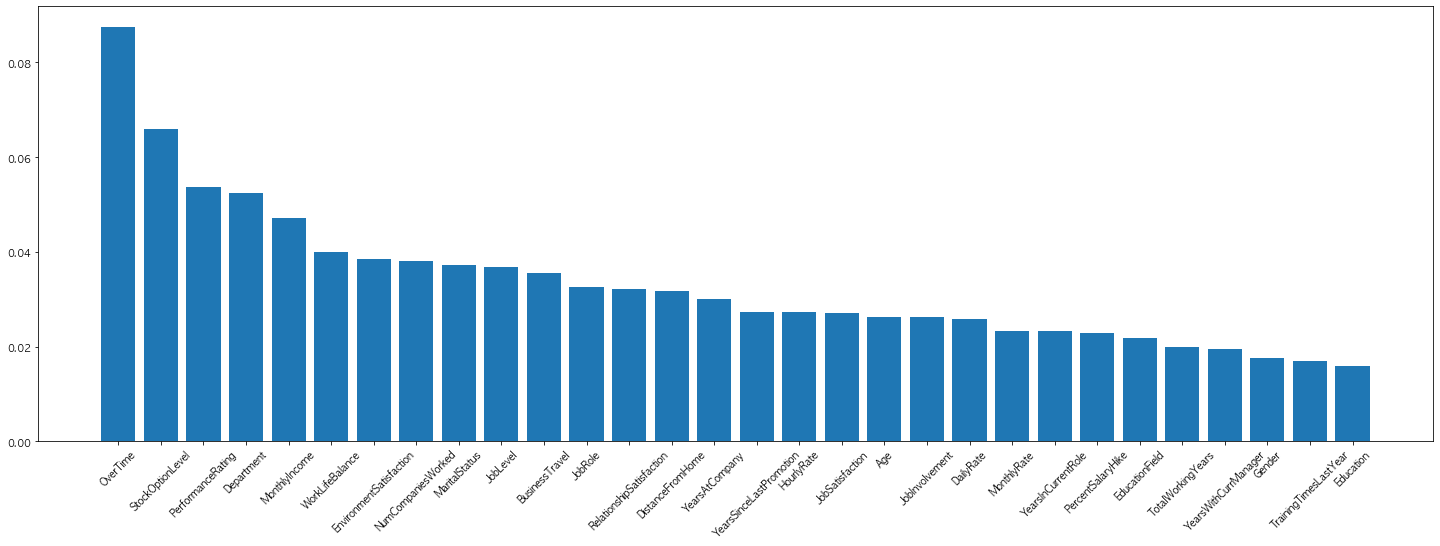

In [209]:
# XGBoost Model 변수 중요도

pd.DataFrame({'feature':x.columns, 'importance':xgb_model.feature_importances_}).sort_values(by='importance',ascending=False).T
xgb_imp = pd.DataFrame({'feature':x.columns, 'importance':xgb_model.feature_importances_}).sort_values(by='importance',ascending=False)

fig = plt.figure(figsize=(25,8))
plt.bar(xgb_imp['feature'],xgb_imp['importance'])
plt.xticks(rotation=45)
plt.show()

---

#### LogisticRegression Model HyperParameter

In [210]:
# LogisticRegression Model HyperParameter

lr_model = LogisticRegression()
param_grid = {'C':[0.01,0.1,1,5,10],
             'max_iter':[10000,30000]}
grid_cv = GridSearchCV(lr_model,param_grid = param_grid, cv=4, n_jobs=-1)
grid_cv.fit(x_train,y_train)
print('최적 hyper parameter:',grid_cv.best_params_)
print('최고 accuracy :',grid_cv.best_score_)
lr_model_hyper = grid_cv.best_estimator_
lr_hyper_pred = lr_model_hyper.predict(x_test)
print('=======================================================')
print('hyper parameter 적용 후 테스트 데이터에 대한 정확도')
print(' ')
print(classification_report(y_test,lr_hyper_pred))

# 정확도 저장
accuracy_hyper = []
accuracy_hyper.append({'model':'LogisticRegression',
                 'accuracy':round(accuracy_score(y_test,lr_hyper_pred),2)})

최적 hyper parameter: {'C': 0.1, 'max_iter': 10000}
최고 accuracy : 0.8266439502630322
hyper parameter 적용 후 테스트 데이터에 대한 정확도
 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       174
           1       0.88      0.23      0.36        31

    accuracy                           0.88       205
   macro avg       0.88      0.61      0.65       205
weighted avg       0.88      0.88      0.85       205



* LogisticRegression Model HyperParameter 변수 중요도

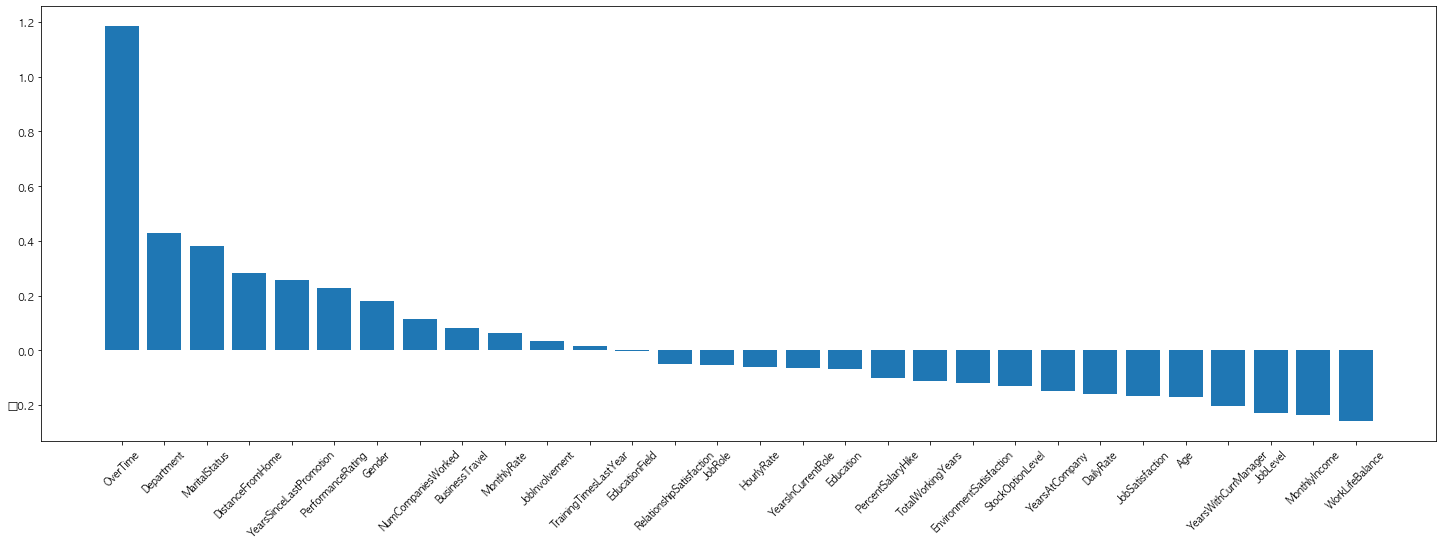

In [211]:
#LogisticRegression Model HyperParameter 변수 중요도

pd.DataFrame({'feature':x.columns, 'importance':lr_model_hyper.coef_[0]}).sort_values(by='importance',ascending=False).T
lr_hyper_imp = pd.DataFrame({'feature':x.columns, 'importance':lr_model_hyper.coef_[0]}).sort_values(by='importance',ascending=False)

fig = plt.figure(figsize=(25,8))
plt.bar(lr_hyper_imp['feature'],lr_hyper_imp['importance'])
plt.xticks(rotation=45)
plt.show()

---

#### DecisionTree Model HyperParameter

In [212]:
# DecisionTree Model HyperParameter

clf_model = DecisionTreeClassifier()
param_grid = {'max_depth':[6,8,10,12],
             'min_samples_leaf':[8,12,18],
             'min_samples_split':[8,16,20]}
grid_cv = GridSearchCV(clf_model,param_grid = param_grid, cv=4,n_jobs=-1)
grid_cv.fit(x_train,y_train)
print('최적 hyper parameter:',grid_cv.best_params_)
print('최고 accuracy :',grid_cv.best_score_)
clf_model_hyper = grid_cv.best_estimator_ # 최적화 값을 가지고 다시 예측
clf_hyper_pred = clf_model_hyper.predict(x_test)
accuracy_score(y_test,clf_hyper_pred)
# grid_cv.best_score_
# y_pred = grid_cv.predict(x_test)
# accuracy_score(y_test,y_pred)
# estimator = grid_cv.best_estimator_
# y_esti = estimator.predict(x_test)
# accuracy_score(y_test,y_esti)

# 의사결정나무 정확도
print('=======================================================')
print('hyper parameter 적용 후 테스트 데이터에 대한 정확도')
print(' ')
print(classification_report(y_test,clf_hyper_pred))

# 정확도 저장
accuracy_hyper.append({'model':'DecisionTreeClassifier',
                 'accuracy':round(accuracy_score(y_test,clf_hyper_pred),2)})

최적 hyper parameter: {'max_depth': 6, 'min_samples_leaf': 18, 'min_samples_split': 8}
최고 accuracy : 0.8144488283118126
hyper parameter 적용 후 테스트 데이터에 대한 정확도
 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       174
           1       0.39      0.23      0.29        31

    accuracy                           0.83       205
   macro avg       0.63      0.58      0.59       205
weighted avg       0.80      0.83      0.81       205



* DecisionTree Model HyperParameter 변수 중요도

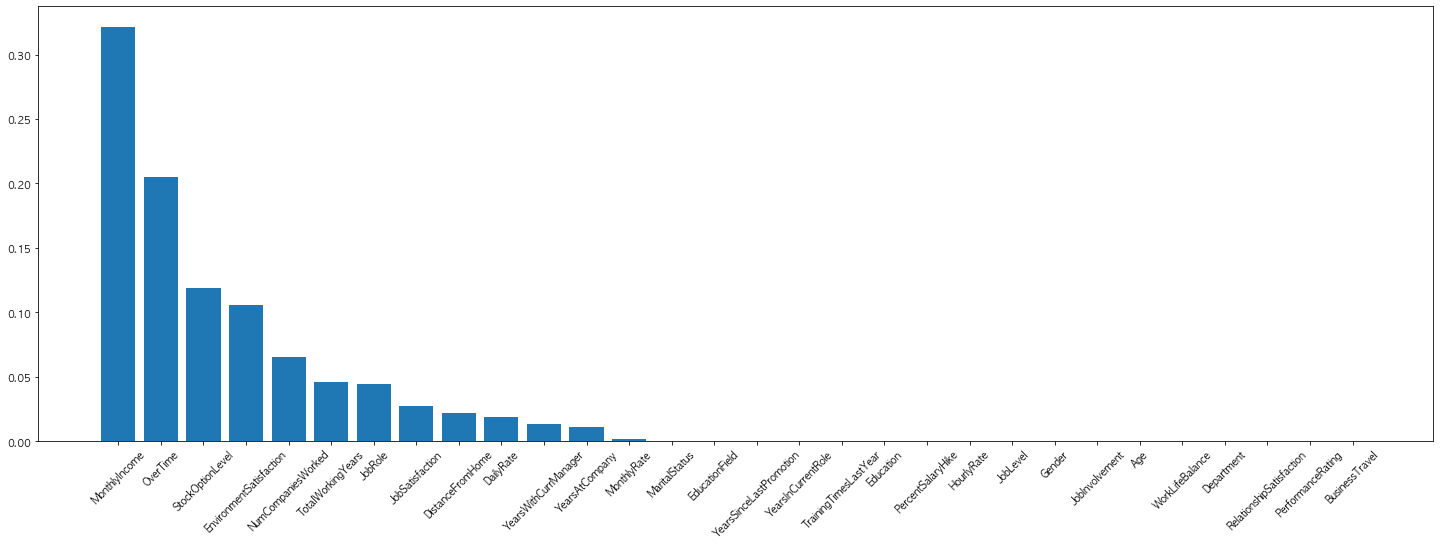

In [213]:
#DecisionTree Model HyperParameter 변수 중요도

pd.DataFrame({'feature':x.columns, 'importance':clf_model_hyper.feature_importances_}).sort_values(by='importance',ascending=False).T
clf_hyper_imp = pd.DataFrame({'feature':x.columns, 'importance':clf_model_hyper.feature_importances_}).sort_values(by='importance',ascending=False)

fig = plt.figure(figsize=(25,8))
plt.bar(clf_hyper_imp['feature'],clf_hyper_imp['importance'])
plt.xticks(rotation=45)
plt.show()

---

#### RandomForest Model HyperParameter

In [214]:
# RandomForest Model HyperParameter

rf_model = RandomForestClassifier()
param_grid = {'max_depth':[6,8,10,12],
             'min_samples_leaf':[8,12,18],
             'min_samples_split':[8,16,20]}
grid_cv = GridSearchCV(rf_model,param_grid = param_grid, cv=4,n_jobs=-1)
grid_cv.fit(x_train,y_train)
print('최적 hyper parameter:',grid_cv.best_params_)
print('최고 accuracy :',grid_cv.best_score_)
rf_model_hyper = grid_cv.best_estimator_ # 최적화 값
rf_hyper_pred = rf_model_hyper.predict(x_test)
print('=======================================================')
print('hyper parameter 적용 후 테스트 데이터에 대한 정확도')
print(' ')
print(classification_report(y_test,rf_hyper_pred))

# 정확도 저장
accuracy_hyper.append({'model':'RandomForestClassifier',
                 'accuracy':round(accuracy_score(y_test,rf_hyper_pred),2)})

최적 hyper parameter: {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8}
최고 accuracy : 0.8254005260640842
hyper parameter 적용 후 테스트 데이터에 대한 정확도
 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       174
           1       1.00      0.16      0.28        31

    accuracy                           0.87       205
   macro avg       0.94      0.58      0.60       205
weighted avg       0.89      0.87      0.83       205



* RandomForest Model HyperParameter 변수 중요도

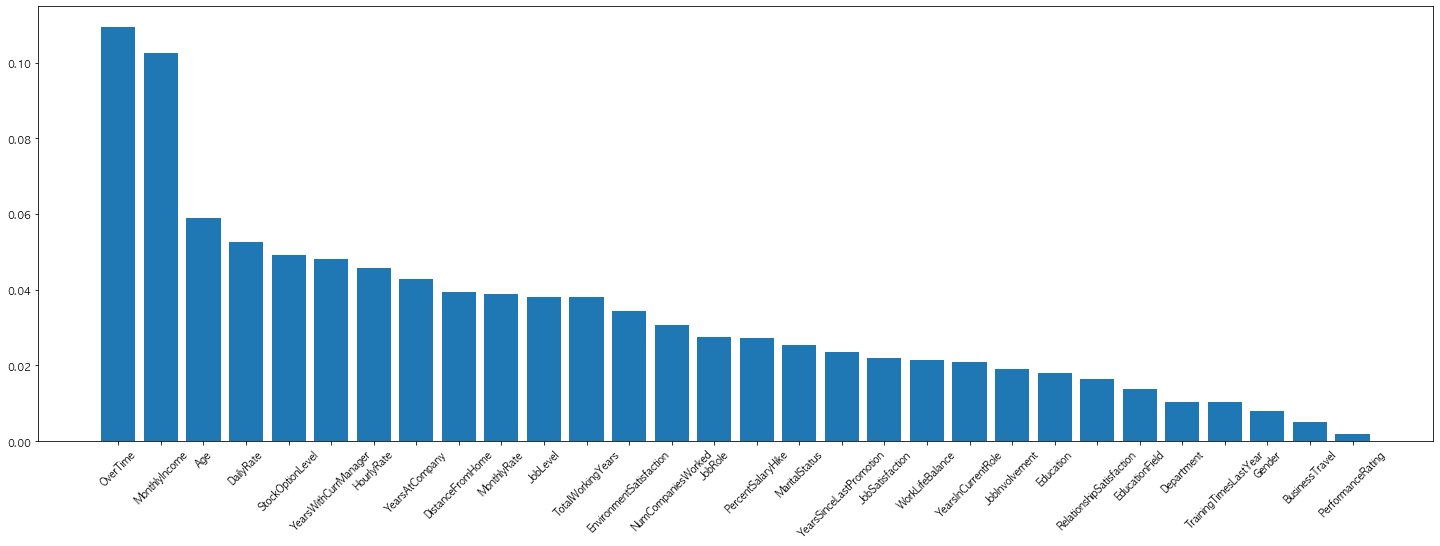

In [215]:
# RandomForest Model HyperParameter 변수 중요도

pd.DataFrame({'feature':x.columns, 'importance':rf_model_hyper.feature_importances_}).sort_values(by='importance',ascending=False).T
rf_hyper_imp = pd.DataFrame({'feature':x.columns, 'importance':rf_model_hyper.feature_importances_}).sort_values(by='importance',ascending=False)

fig = plt.figure(figsize=(25,8))
plt.bar(rf_hyper_imp['feature'],rf_hyper_imp['importance'])
plt.xticks(rotation=45)
plt.show()

---

#### XGBoost HyperParameter

In [216]:
# XGBoost HyperParameter

xgb_model = xgb.XGBClassifier()
param_grid = {'booster':['gbtree'],
              'max_depth':[6,8,10,12],
              'min_child_weight':[8,12,18],
              'objective':['binary:logistic']}
grid_cv = GridSearchCV(xgb_model,param_grid = param_grid, cv=4, n_jobs=-1)
grid_cv.fit(x_train,y_train)
print('최적 hyper parameter:',grid_cv.best_params_)
print('최고 accuracy :',grid_cv.best_score_)
xgb_model_hyper = grid_cv.best_estimator_ # 최적화 값
xgb_hyper_pred = xgb_model_hyper.predict(x_test)
accuracy_score(y_test,xgb_hyper_pred)
print('=======================================================')
print('hyper parameter 적용 후 테스트 데이터에 대한 정확도')
print(' ')
print(classification_report(y_test,xgb_hyper_pred))

# 정확도 저장
accuracy_hyper.append({'model':'XGBClassifier',
                 'accuracy':round(accuracy_score(y_test,xgb_hyper_pred),2)})

/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/xgbo

[11:36:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
최적 hyper parameter: {'booster': 'gbtree', 'max_depth': 6, 'min_child_weight': 18, 'objective': 'binary:logistic'}
최고 accuracy : 0.8498565279770445
hyper parameter 적용 후 테스트 데이터에 대한 정확도
 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       174
           1       0.75      0.39      0.51        31

    accuracy                           0.89       205
   macro avg       0.82      0.68      0.72       205
weighted avg       0.88      0.89      0.87       205



* XGBoost Model HyperParameter 변수 중요도

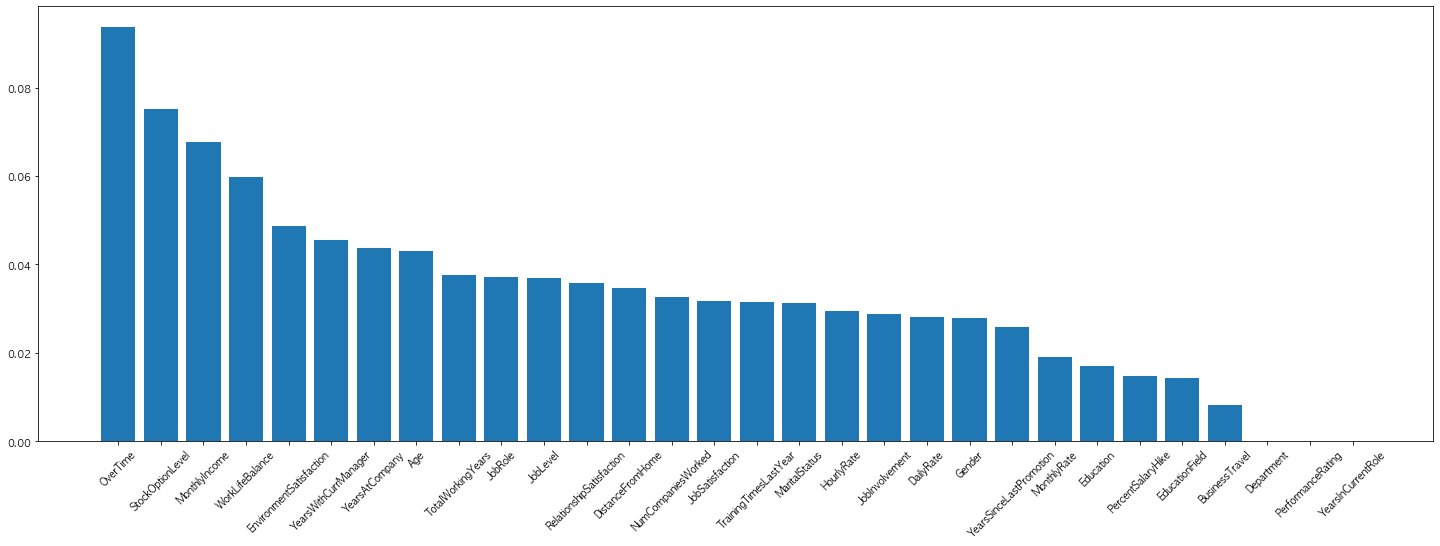

In [217]:
# XGBoost Model HyperParameter 변수 중요도

pd.DataFrame({'feature':x.columns, 'importance':xgb_model_hyper.feature_importances_}).sort_values(by='importance',ascending=False).T
xgb_hyper_imp = pd.DataFrame({'feature':x.columns, 'importance':xgb_model_hyper.feature_importances_}).sort_values(by='importance',ascending=False)

fig = plt.figure(figsize=(25,8))
plt.bar(xgb_hyper_imp['feature'],xgb_hyper_imp['importance'])
plt.xticks(rotation=45)
plt.show()

---

#### Accuracy 비교 그래프

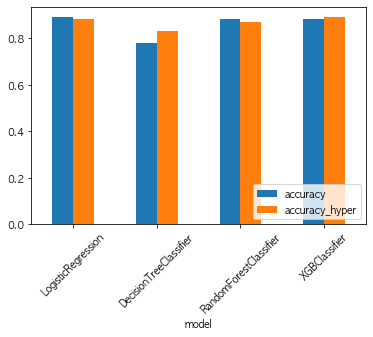

In [284]:
acc = pd.merge(pd.DataFrame(accuracy),pd.DataFrame(accuracy_hyper),on='model')

acc.rename(columns={'accuracy_x':'accuracy','accuracy_y':'accuracy_hyper'},inplace=True)
acc.set_index(keys='model',drop=True,inplace=True)

acc.plot(kind='bar')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

In [285]:
acc

,accuracy,accuracy_hyper
model,,
LogisticRegression,0.89,0.88
DecisionTreeClassifier,0.78,0.83
RandomForestClassifier,0.88,0.87
XGBClassifier,0.88,0.89
